Import the libraries to be used in the project

In [873]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer 

- Read the first CSV file into a data frame (250 Country Data)
- Rename one column value from name to country(to make more sense)
- Explore the previously mentioned data frame

In [874]:
df_Country_data = pd.read_csv('250 Country Data.csv')
del df_Country_data["Unnamed: 0"]
df_Country_data = df_Country_data.rename(columns = {'name': 'Country'}, inplace = False)
df_Country_data

,Country,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
0,Afghanistan,Asia,Southern Asia,27657145,652230.00,27.80,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35% (2008 est.).
1,Åland Islands,Europe,Northern Europe,28875,1580.00,nan,NaN,NaN,NaN,NaN
2,Albania,Europe,Southern Europe,2886026,28748.00,34.50,.7% (2013 est.).,98.7% (2011 est.),1.7% (2013 est.).,16.9% official rate (2013 est.). Note: These a...
3,Algeria,Africa,Northern Africa,40400000,2381741.00,35.30,3.1%.,79%,3.9%.,10.3%.
4,American Samoa,Oceania,Polynesia,57100,199.00,nan,3%.,97% (1980 est.),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
245,Wallis and Futuna,Oceania,Polynesia,11750,142.00,nan,NaN,NaN,NaN,NaN
246,Western Sahara,Africa,Northern Africa,510713,266000.00,nan,NaN,NaN,NaN,NaN
247,Yemen,Asia,Western Asia,27478000,527968.00,37.70,3.8%.,65.3% (2011 est.),11.8%.,35% (2003 est.).
248,Zambia,Africa,Eastern Africa,15933883,752612.00,54.60,6%.,61.4% (2007 est.),7.1%.,15% (2008 est.).


- Read the next CSV file into a dataframe(Life Expectancy)
- Extract the year 2015 data from it (as the year 2015 is the common acriss the data files)

In [875]:
df_LifeExpec = pd.read_csv('Life Expectancy Data.csv')
df_2015_lifeExp=df_LifeExpec.loc[df_LifeExpec['Year'] == 2015]
df_2015_lifeExp

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,19.10,83,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10
16,Albania,2015,Developing,77.80,74.00,0,4.60,364.98,99.00,0,58.00,0,99.00,6.00,99.00,0.10,3954.23,28873.00,1.20,1.30,0.76,14.20
32,Algeria,2015,Developing,75.60,19.00,21,nan,0.00,95.00,63,59.50,24,95.00,nan,95.00,0.10,4132.76,39871528.00,6.00,5.80,0.74,14.40
48,Angola,2015,Developing,52.40,335.00,66,nan,0.00,64.00,118,23.30,98,7.00,nan,64.00,1.90,3695.79,2785935.00,8.30,8.20,0.53,11.40
64,Antigua and Barbuda,2015,Developing,76.40,13.00,0,nan,0.00,99.00,0,47.70,0,86.00,nan,99.00,0.20,13566.95,nan,3.30,3.30,0.78,13.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.10,157.00,9,nan,0.00,87.00,0,62.10,10,87.00,nan,87.00,0.10,nan,nan,1.60,1.50,0.77,14.30
2874,Viet Nam,2015,Developing,76.00,127.00,28,nan,0.00,97.00,256,17.50,35,97.00,nan,97.00,0.10,nan,nan,14.20,14.50,0.68,12.60
2890,Yemen,2015,Developing,65.70,224.00,37,nan,0.00,69.00,468,41.30,47,63.00,nan,69.00,0.10,nan,nan,13.60,13.40,0.50,9.00
2906,Zambia,2015,Developing,61.80,33.00,27,nan,0.00,9.00,9,23.40,40,9.00,nan,9.00,4.10,1313.89,161587.00,6.30,6.10,0.58,12.50


In [876]:
df_2000_lifeExp=df_LifeExpec.loc[df_LifeExpec['Year'] == 2000]
df_2000_lifeExp_Country_LifeExpec = df_2000_lifeExp[['Country', 'Life expectancy ']]
df_2000_lifeExp_Country_LifeExpec = df_2000_lifeExp_Country_LifeExpec.rename(columns={"Life expectancy ":"Life expectancy 2000"})
df_2000_lifeExp_Country_LifeExpec

,Country,Life expectancy 2000
15,Afghanistan,54.80
31,Albania,72.60
47,Algeria,71.30
63,Angola,45.30
79,Antigua and Barbuda,73.60
...,...,...
2873,Venezuela (Bolivarian Republic of),72.50
2889,Viet Nam,73.40
2905,Yemen,68.00
2921,Zambia,43.80


Read the 2015 & 2019 CSV files into a data frames

In [877]:
df_Year_2015 =  pd.read_csv('2015.csv')
df_Year_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47
4,Canada,North America,5,7.43,0.04,1.33,1.32,0.91,0.63,0.33,0.46,2.45
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67
154,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63
155,Syria,Middle East and Northern Africa,156,3.01,0.05,0.66,0.47,0.72,0.16,0.19,0.47,0.33
156,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83


In [878]:
df_Year_2019 =  pd.read_csv('2019.csv')
df_Year_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.77,1.34,1.59,0.99,0.60,0.15,0.39
1,2,Denmark,7.60,1.38,1.57,1.00,0.59,0.25,0.41
2,3,Norway,7.55,1.49,1.58,1.03,0.60,0.27,0.34
3,4,Iceland,7.49,1.38,1.62,1.03,0.59,0.35,0.12
4,5,Netherlands,7.49,1.40,1.52,1.00,0.56,0.32,0.30
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.33,0.36,0.71,0.61,0.56,0.22,0.41
152,153,Tanzania,3.23,0.48,0.89,0.50,0.42,0.28,0.15
153,154,Afghanistan,3.20,0.35,0.52,0.36,0.00,0.16,0.03
154,155,Central African Republic,3.08,0.03,0.00,0.10,0.23,0.23,0.04


In [879]:
df_Year_2019_Country_Score = df_Year_2019[['Country or region', 'Score']]
df_Year_2019_Country_Score = df_Year_2019_Country_Score.rename(columns={"Country or region":"Country"})
df_Year_2019_Country_Score

,Country,Score
0,Finland,7.77
1,Denmark,7.60
2,Norway,7.55
3,Iceland,7.49
4,Netherlands,7.49
...,...,...
151,Rwanda,3.33
152,Tanzania,3.23
153,Afghanistan,3.20
154,Central African Republic,3.08


In [880]:
df_GDP_per_capita = pd.read_csv("GDP per capita.csv")
df_GDP_per_capita = df_GDP_per_capita[["Country Name", "2015"]]
df_GDP_per_capita = df_GDP_per_capita.rename(columns={"Country Name":"Country"})
df_GDP_per_capita

,Country,2015
0,Aruba,27980.88
1,Afghanistan,578.47
2,Angola,4166.98
3,Albania,3952.80
4,Andorra,35762.52
...,...,...
259,Kosovo,3603.03
260,"Yemen, Rep.",1395.44
261,South Africa,5734.63
262,Zambia,1337.80


Merge two of the previously mentioned data frames into one (the year 2015 data frame and the life expectancy data frame)

In [881]:
df_merge_2015_Exp = pd.merge(df_Year_2015,df_2015_lifeExp, on='Country')
df_merge_2015_Exp 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,nan,0.00,nan,35,57.40,0,97.00,nan,97.00,0.10,8989.84,8282396.00,0.40,0.30,0.94,16.00
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,nan,0.00,nan,0,61.00,0,92.00,nan,92.00,0.10,5734.44,33815.00,1.00,0.90,0.92,19.00
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,nan,0.00,nan,9,58.80,0,93.00,nan,93.00,0.10,5314.64,5683483.00,1.10,0.90,0.92,19.20
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,5.97,0.00,nan,14,61.20,0,95.00,nan,95.00,0.10,7455.25,518867.00,0.80,0.70,0.95,17.70
4,Canada,North America,5,7.43,0.04,1.33,1.32,0.91,0.63,0.33,0.46,2.45,2015,Developing,82.20,64.00,2,nan,0.00,55.00,195,67.00,2,91.00,nan,91.00,0.10,43315.74,3584861.00,0.60,0.50,0.92,16.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,19.10,83,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10
131,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,nan,0.00,98.00,1,21.40,15,99.00,nan,98.00,0.40,71.35,11629553.00,5.70,5.70,0.49,10.80
132,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,nan,0.00,82.00,55,25.70,39,78.00,nan,82.00,1.00,783.95,1575952.00,6.90,6.80,0.48,10.70
133,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,nan,0.00,94.00,9,18.70,31,94.00,nan,94.00,0.70,33.68,119927.00,7.30,7.20,0.41,10.60


- Merge the third data frame
- Checking the unemplpyment rate of Liberia as we noticed that it was unusually high (exploring the data)

In [882]:
df_merge_2015_Exp_250Country = pd.merge(df_merge_2015_Exp,df_Country_data , on='Country')
df_merge_2015_Exp_250Country[df_merge_2015_Exp_250Country["Country"] == "Liberia"]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
97,Liberia,Sub-Saharan Africa,116,4.57,0.11,0.07,0.79,0.34,0.29,0.06,0.24,2.78,2015,Developing,61.40,259.00,8,nan,0.00,52.00,1060,27.30,11,52.00,nan,52.00,0.90,452.39,4499621.00,6.50,6.40,0.43,9.90,Africa,Western Africa,4615000,111369.00,38.20,8.1%.,60.8% (2010 est.),5.2%.,85% (2003 est.).


In [883]:
df_merge_2015_Exp_250Country = pd.merge(df_merge_2015_Exp_250Country,df_Year_2019_Country_Score, on='Country', how='left')
df_merge_2015_Exp_250Country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Score
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,nan,0.00,nan,35,57.40,0,97.00,nan,97.00,0.10,8989.84,8282396.00,0.40,0.30,0.94,16.00,Europe,Western Europe,8341600,41284.00,33.70,2%.,99% (2003 est.),-0.4%.,3.2%.,7.48
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,nan,0.00,nan,0,61.00,0,92.00,nan,92.00,0.10,5734.44,33815.00,1.00,0.90,0.92,19.00,Europe,Northern Europe,334300,103000.00,nan,1.9%.,99% (2003 est.),3.9%.,4.5%.,7.49
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,nan,0.00,nan,9,58.80,0,93.00,nan,93.00,0.10,5314.64,5683483.00,1.10,0.90,0.92,19.20,Europe,Northern Europe,5717014,43094.00,24.00,0.1%.,99%,0.8%.,6%.,7.60
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,5.97,0.00,nan,14,61.20,0,95.00,nan,95.00,0.10,7455.25,518867.00,0.80,0.70,0.95,17.70,Europe,Northern Europe,5223256,323802.00,25.80,1.6%.,100%,1.9%.,3.6%.,7.55
4,Canada,North America,5,7.43,0.04,1.33,1.32,0.91,0.63,0.33,0.46,2.45,2015,Developing,82.20,64.00,2,nan,0.00,55.00,195,67.00,2,91.00,nan,91.00,0.10,43315.74,3584861.00,0.60,0.50,0.92,16.30,Americas,Northern America,36155487,9984670.00,32.60,NaN,NaN,NaN,NaN,7.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,19.10,83,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10,Asia,Southern Asia,27657145,652230.00,27.80,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35% (2008 est.).,3.20
131,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,nan,0.00,98.00,1,21.40,15,99.00,nan,98.00,0.40,71.35,11629553.00,5.70,5.70,0.49,10.80,Africa,Eastern Africa,11553188,26338.00,50.80,7.5%.,71.1% (2010 est.),5.9%.,n.a.,3.33
132,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,nan,0.00,82.00,55,25.70,39,78.00,nan,82.00,1.00,783.95,1575952.00,6.90,6.80,0.48,10.70,Africa,Western Africa,10653654,112622.00,38.60,5%.,42.4% (2010),2.4%.,n.a.,4.88
133,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,nan,0.00,94.00,9,18.70,31,94.00,nan,94.00,0.70,33.68,119927.00,7.30,7.20,0.41,10.60,Africa,Eastern Africa,10114505,27834.00,33.30,4.5%.,67.2% (2010 est.),9.3%.,n.a.,3.77


In [884]:
df_merge_2015_Exp_250Country = df_merge_2015_Exp_250Country.rename(columns={"Score":"Happiness Score 2019"})
df_merge_2015_Exp_250Country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,nan,0.00,nan,35,57.40,0,97.00,nan,97.00,0.10,8989.84,8282396.00,0.40,0.30,0.94,16.00,Europe,Western Europe,8341600,41284.00,33.70,2%.,99% (2003 est.),-0.4%.,3.2%.,7.48
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,nan,0.00,nan,0,61.00,0,92.00,nan,92.00,0.10,5734.44,33815.00,1.00,0.90,0.92,19.00,Europe,Northern Europe,334300,103000.00,nan,1.9%.,99% (2003 est.),3.9%.,4.5%.,7.49
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,nan,0.00,nan,9,58.80,0,93.00,nan,93.00,0.10,5314.64,5683483.00,1.10,0.90,0.92,19.20,Europe,Northern Europe,5717014,43094.00,24.00,0.1%.,99%,0.8%.,6%.,7.60
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,5.97,0.00,nan,14,61.20,0,95.00,nan,95.00,0.10,7455.25,518867.00,0.80,0.70,0.95,17.70,Europe,Northern Europe,5223256,323802.00,25.80,1.6%.,100%,1.9%.,3.6%.,7.55
4,Canada,North America,5,7.43,0.04,1.33,1.32,0.91,0.63,0.33,0.46,2.45,2015,Developing,82.20,64.00,2,nan,0.00,55.00,195,67.00,2,91.00,nan,91.00,0.10,43315.74,3584861.00,0.60,0.50,0.92,16.30,Americas,Northern America,36155487,9984670.00,32.60,NaN,NaN,NaN,NaN,7.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,19.10,83,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10,Asia,Southern Asia,27657145,652230.00,27.80,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35% (2008 est.).,3.20
131,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,nan,0.00,98.00,1,21.40,15,99.00,nan,98.00,0.40,71.35,11629553.00,5.70,5.70,0.49,10.80,Africa,Eastern Africa,11553188,26338.00,50.80,7.5%.,71.1% (2010 est.),5.9%.,n.a.,3.33
132,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,nan,0.00,82.00,55,25.70,39,78.00,nan,82.00,1.00,783.95,1575952.00,6.90,6.80,0.48,10.70,Africa,Western Africa,10653654,112622.00,38.60,5%.,42.4% (2010),2.4%.,n.a.,4.88
133,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,nan,0.00,94.00,9,18.70,31,94.00,nan,94.00,0.70,33.68,119927.00,7.30,7.20,0.41,10.60,Africa,Eastern Africa,10114505,27834.00,33.30,4.5%.,67.2% (2010 est.),9.3%.,n.a.,3.77


In [885]:
df_merge_2015_Exp_250Country['Happiness Score 2019'] = df_merge_2015_Exp_250Country['Happiness Score 2019'].fillna(df_merge_2015_Exp_250Country['Happiness Score 2019'].mean())
df_merge_2015_Exp_250Country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,nan,0.00,nan,35,57.40,0,97.00,nan,97.00,0.10,8989.84,8282396.00,0.40,0.30,0.94,16.00,Europe,Western Europe,8341600,41284.00,33.70,2%.,99% (2003 est.),-0.4%.,3.2%.,7.48
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,nan,0.00,nan,0,61.00,0,92.00,nan,92.00,0.10,5734.44,33815.00,1.00,0.90,0.92,19.00,Europe,Northern Europe,334300,103000.00,nan,1.9%.,99% (2003 est.),3.9%.,4.5%.,7.49
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,nan,0.00,nan,9,58.80,0,93.00,nan,93.00,0.10,5314.64,5683483.00,1.10,0.90,0.92,19.20,Europe,Northern Europe,5717014,43094.00,24.00,0.1%.,99%,0.8%.,6%.,7.60
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,5.97,0.00,nan,14,61.20,0,95.00,nan,95.00,0.10,7455.25,518867.00,0.80,0.70,0.95,17.70,Europe,Northern Europe,5223256,323802.00,25.80,1.6%.,100%,1.9%.,3.6%.,7.55
4,Canada,North America,5,7.43,0.04,1.33,1.32,0.91,0.63,0.33,0.46,2.45,2015,Developing,82.20,64.00,2,nan,0.00,55.00,195,67.00,2,91.00,nan,91.00,0.10,43315.74,3584861.00,0.60,0.50,0.92,16.30,Americas,Northern America,36155487,9984670.00,32.60,NaN,NaN,NaN,NaN,7.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,19.10,83,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10,Asia,Southern Asia,27657145,652230.00,27.80,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35% (2008 est.).,3.20
131,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,nan,0.00,98.00,1,21.40,15,99.00,nan,98.00,0.40,71.35,11629553.00,5.70,5.70,0.49,10.80,Africa,Eastern Africa,11553188,26338.00,50.80,7.5%.,71.1% (2010 est.),5.9%.,n.a.,3.33
132,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,nan,0.00,82.00,55,25.70,39,78.00,nan,82.00,1.00,783.95,1575952.00,6.90,6.80,0.48,10.70,Africa,Western Africa,10653654,112622.00,38.60,5%.,42.4% (2010),2.4%.,n.a.,4.88
133,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,nan,0.00,94.00,9,18.70,31,94.00,nan,94.00,0.70,33.68,119927.00,7.30,7.20,0.41,10.60,Africa,Eastern Africa,10114505,27834.00,33.30,4.5%.,67.2% (2010 est.),9.3%.,n.a.,3.77


In [886]:
df_merge_2015_Exp_250Country = pd.merge(df_merge_2015_Exp_250Country,df_2000_lifeExp_Country_LifeExpec, on='Country', how='left')
df_merge_2015_Exp_250Country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,nan,0.00,nan,35,57.40,0,97.00,nan,97.00,0.10,8989.84,8282396.00,0.40,0.30,0.94,16.00,Europe,Western Europe,8341600,41284.00,33.70,2%.,99% (2003 est.),-0.4%.,3.2%.,7.48,79.70
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,nan,0.00,nan,0,61.00,0,92.00,nan,92.00,0.10,5734.44,33815.00,1.00,0.90,0.92,19.00,Europe,Northern Europe,334300,103000.00,nan,1.9%.,99% (2003 est.),3.9%.,4.5%.,7.49,79.70
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,nan,0.00,nan,9,58.80,0,93.00,nan,93.00,0.10,5314.64,5683483.00,1.10,0.90,0.92,19.20,Europe,Northern Europe,5717014,43094.00,24.00,0.1%.,99%,0.8%.,6%.,7.60,76.90
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,5.97,0.00,nan,14,61.20,0,95.00,nan,95.00,0.10,7455.25,518867.00,0.80,0.70,0.95,17.70,Europe,Northern Europe,5223256,323802.00,25.80,1.6%.,100%,1.9%.,3.6%.,7.55,78.50
4,Canada,North America,5,7.43,0.04,1.33,1.32,0.91,0.63,0.33,0.46,2.45,2015,Developing,82.20,64.00,2,nan,0.00,55.00,195,67.00,2,91.00,nan,91.00,0.10,43315.74,3584861.00,0.60,0.50,0.92,16.30,Americas,Northern America,36155487,9984670.00,32.60,NaN,NaN,NaN,NaN,7.28,79.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,19.10,83,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10,Asia,Southern Asia,27657145,652230.00,27.80,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35% (2008 est.).,3.20,54.80
131,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,nan,0.00,98.00,1,21.40,15,99.00,nan,98.00,0.40,71.35,11629553.00,5.70,5.70,0.49,10.80,Africa,Eastern Africa,11553188,26338.00,50.80,7.5%.,71.1% (2010 est.),5.9%.,n.a.,3.33,48.30
132,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,nan,0.00,82.00,55,25.70,39,78.00,nan,82.00,1.00,783.95,1575952.00,6.90,6.80,0.48,10.70,Africa,Western Africa,10653654,112622.00,38.60,5%.,42.4% (2010),2.4%.,n.a.,4.88,55.40
133,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,nan,0.00,94.00,9,18.70,31,94.00,nan,94.00,0.70,33.68,119927.00,7.30,7.20,0.41,10.60,Africa,Eastern Africa,10114505,27834.00,33.30,4.5%.,67.2% (2010 est.),9.3%.,n.a.,3.77,58.00


Printing the unemployment rate column to explore the data

In [887]:
unemployment = df_merge_2015_Exp_250Country.loc[:,'Unemployement(%)':'Unemployement(%)']
unemployment 

,Unemployement(%)
0,3.2%.
1,4.5%.
2,6%.
3,3.6%.
4,NaN
...,...
130,35% (2008 est.).
131,n.a.
132,n.a.
133,n.a.


Unifying all the null values in the unemployment column to be np.nan (NaN)

In [888]:
unemployment['Unemployement(%)'].replace({'N.A.':np.nan,'n.a.':np.nan,'NaN':np.nan},inplace=True)
unemployment

,Unemployement(%)
0,3.2%.
1,4.5%.
2,6%.
3,3.6%.
4,NaN
...,...
130,35% (2008 est.).
131,NaN
132,NaN
133,NaN


Extracting the numbers in the data of the unemployment column (Data Tidying)

In [889]:
unemployment['Unemployement(%)'] = unemployment['Unemployement(%)'].str.extract('(\d+)').astype(float)
unemployment 

,Unemployement(%)
0,3.00
1,4.00
2,6.00
3,3.00
4,nan
...,...
130,35.00
131,nan
132,nan
133,nan


Summing up the null values in the unemployment column (Data Exploring)

In [890]:
NaN_Values = unemployment['Unemployement(%)'].isna().sum()
NaN_Values


29

Setting the unemployment column in our data to be the processed unemployment series

In [891]:
df_merge_2015_Exp_250Country['Unemployement(%)'] =unemployment['Unemployement(%)']
df_merge_2015_Exp_250Country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,nan,0.00,nan,35,57.40,0,97.00,nan,97.00,0.10,8989.84,8282396.00,0.40,0.30,0.94,16.00,Europe,Western Europe,8341600,41284.00,33.70,2%.,99% (2003 est.),-0.4%.,3.00,7.48,79.70
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,nan,0.00,nan,0,61.00,0,92.00,nan,92.00,0.10,5734.44,33815.00,1.00,0.90,0.92,19.00,Europe,Northern Europe,334300,103000.00,nan,1.9%.,99% (2003 est.),3.9%.,4.00,7.49,79.70
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,nan,0.00,nan,9,58.80,0,93.00,nan,93.00,0.10,5314.64,5683483.00,1.10,0.90,0.92,19.20,Europe,Northern Europe,5717014,43094.00,24.00,0.1%.,99%,0.8%.,6.00,7.60,76.90
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,5.97,0.00,nan,14,61.20,0,95.00,nan,95.00,0.10,7455.25,518867.00,0.80,0.70,0.95,17.70,Europe,Northern Europe,5223256,323802.00,25.80,1.6%.,100%,1.9%.,3.00,7.55,78.50
4,Canada,North America,5,7.43,0.04,1.33,1.32,0.91,0.63,0.33,0.46,2.45,2015,Developing,82.20,64.00,2,nan,0.00,55.00,195,67.00,2,91.00,nan,91.00,0.10,43315.74,3584861.00,0.60,0.50,0.92,16.30,Americas,Northern America,36155487,9984670.00,32.60,NaN,NaN,NaN,nan,7.28,79.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,19.10,83,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10,Asia,Southern Asia,27657145,652230.00,27.80,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35.00,3.20,54.80
131,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,nan,0.00,98.00,1,21.40,15,99.00,nan,98.00,0.40,71.35,11629553.00,5.70,5.70,0.49,10.80,Africa,Eastern Africa,11553188,26338.00,50.80,7.5%.,71.1% (2010 est.),5.9%.,nan,3.33,48.30
132,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,nan,0.00,82.00,55,25.70,39,78.00,nan,82.00,1.00,783.95,1575952.00,6.90,6.80,0.48,10.70,Africa,Western Africa,10653654,112622.00,38.60,5%.,42.4% (2010),2.4%.,nan,4.88,55.40
133,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,nan,0.00,94.00,9,18.70,31,94.00,nan,94.00,0.70,33.68,119927.00,7.30,7.20,0.41,10.60,Africa,Eastern Africa,10114505,27834.00,33.30,4.5%.,67.2% (2010 est.),9.3%.,nan,3.77,58.00


Showing the mean of the unemployment rate for each country (Exploring Data)

In [892]:
grouped_by_region = df_merge_2015_Exp_250Country.groupby(['Region'])["Unemployement(%)"].mean()
grouped_by_region

Region
Australia and New Zealand          5.50
Central and Eastern Europe        13.15
Eastern Asia                       6.50
Latin America and Caribbean        8.38
Middle East and Northern Africa   11.88
North America                       nan
Southeastern Asia                  3.14
Southern Asia                     15.29
Sub-Saharan Africa                30.58
Western Europe                     9.88
Name: Unemployement(%), dtype: float64

Removing the null values from the unemployment column using the mean values per region (multivariate imputation) (Data Cleaning)

In [893]:
for i in range(0,10):
  region_nan_df = df_merge_2015_Exp_250Country[(df_merge_2015_Exp_250Country['Unemployement(%)'].isna()) & (df_merge_2015_Exp_250Country['Region']==grouped_by_region.index[i])]
  region_nan_df['Unemployement(%)'] = grouped_by_region.values[i]
  df_merge_2015_Exp_250Country[(df_merge_2015_Exp_250Country['Unemployement(%)'].isna()) & (df_merge_2015_Exp_250Country['Region']==grouped_by_region.index[i])]=region_nan_df
df_merge_2015_Exp_250Country

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,nan,0.00,nan,35,57.40,0,97.00,nan,97.00,0.10,8989.84,8282396.00,0.40,0.30,0.94,16.00,Europe,Western Europe,8341600,41284.00,33.70,2%.,99% (2003 est.),-0.4%.,3.00,7.48,79.70
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,nan,0.00,nan,0,61.00,0,92.00,nan,92.00,0.10,5734.44,33815.00,1.00,0.90,0.92,19.00,Europe,Northern Europe,334300,103000.00,nan,1.9%.,99% (2003 est.),3.9%.,4.00,7.49,79.70
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,nan,0.00,nan,9,58.80,0,93.00,nan,93.00,0.10,5314.64,5683483.00,1.10,0.90,0.92,19.20,Europe,Northern Europe,5717014,43094.00,24.00,0.1%.,99%,0.8%.,6.00,7.60,76.90
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,5.97,0.00,nan,14,61.20,0,95.00,nan,95.00,0.10,7455.25,518867.00,0.80,0.70,0.95,17.70,Europe,Northern Europe,5223256,323802.00,25.80,1.6%.,100%,1.9%.,3.00,7.55,78.50
4,Canada,North America,5,7.43,0.04,1.33,1.32,0.91,0.63,0.33,0.46,2.45,2015,Developing,82.20,64.00,2,nan,0.00,55.00,195,67.00,2,91.00,nan,91.00,0.10,43315.74,3584861.00,0.60,0.50,0.92,16.30,Americas,Northern America,36155487,9984670.00,32.60,NaN,NaN,NaN,nan,7.28,79.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,19.10,83,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10,Asia,Southern Asia,27657145,652230.00,27.80,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35.00,3.20,54.80
131,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,nan,0.00,98.00,1,21.40,15,99.00,nan,98.00,0.40,71.35,11629553.00,5.70,5.70,0.49,10.80,Africa,Eastern Africa,11553188,26338.00,50.80,7.5%.,71.1% (2010 est.),5.9%.,30.58,3.33,48.30
132,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,nan,0.00,82.00,55,25.70,39,78.00,nan,82.00,1.00,783.95,1575952.00,6.90,6.80,0.48,10.70,Africa,Western Africa,10653654,112622.00,38.60,5%.,42.4% (2010),2.4%.,30.58,4.88,55.40
133,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,nan,0.00,94.00,9,18.70,31,94.00,nan,94.00,0.70,33.68,119927.00,7.30,7.20,0.41,10.60,Africa,Eastern Africa,10114505,27834.00,33.30,4.5%.,67.2% (2010 est.),9.3%.,30.58,3.77,58.00


Viewing the Literacy rate column (Data Exploring)

In [894]:
df_Literacy_Rate = df_merge_2015_Exp_250Country.loc[:,'Literacy Rate(%)':'Literacy Rate(%)']
df_Literacy_Rate

,Literacy Rate(%)
0,99% (2003 est.)
1,99% (2003 est.)
2,99%
3,100%
4,NaN
...,...
130,28.1% (2000 est.)
131,71.1% (2010 est.)
132,42.4% (2010)
133,67.2% (2010 est.)


Determining the number of missing values in the Literacy rate column (Data Exploring)

In [895]:
total_nans = df_Literacy_Rate.isnull().sum()
total_nans

Literacy Rate(%)    10
dtype: int64

Extracting the numbers from the Literacy rate data (Data Tidying)

In [896]:
df_Literacy_Rate['Literacy Rate(%)'] = df_Literacy_Rate['Literacy Rate(%)'].str.extract('(\d+)').astype(float)
df_Literacy_Rate

,Literacy Rate(%)
0,99.00
1,99.00
2,99.00
3,100.00
4,nan
...,...
130,28.00
131,71.00
132,42.00
133,67.00


Viewing the distribution of the literacy rate data to determine which statistical measure to be used in imputing the missing values

In [897]:
df_Literacy_Rate_list = df_Literacy_Rate['Literacy Rate(%)'].sort_values(ascending=True).values.tolist()


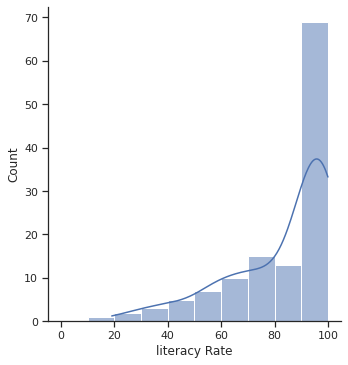

In [898]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
ax = sns.displot(x=df_Literacy_Rate_list,bins=bins,kde=True)
ax.set(xlabel="literacy Rate",ylabel="Count")


Histogram shows that the data is left skewed which indicates the use of the median measure in imputation

Setting the Literacy rate column in our data to be the processed literacy rate series

In [899]:
df_merge_2015_Exp_250Country["Literacy Rate(%)"] = df_Literacy_Rate['Literacy Rate(%)']
df_merge_2015_Exp_250Country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,nan,0.00,nan,35,57.40,0,97.00,nan,97.00,0.10,8989.84,8282396.00,0.40,0.30,0.94,16.00,Europe,Western Europe,8341600,41284.00,33.70,2%.,99.00,-0.4%.,3.00,7.48,79.70
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,nan,0.00,nan,0,61.00,0,92.00,nan,92.00,0.10,5734.44,33815.00,1.00,0.90,0.92,19.00,Europe,Northern Europe,334300,103000.00,nan,1.9%.,99.00,3.9%.,4.00,7.49,79.70
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,nan,0.00,nan,9,58.80,0,93.00,nan,93.00,0.10,5314.64,5683483.00,1.10,0.90,0.92,19.20,Europe,Northern Europe,5717014,43094.00,24.00,0.1%.,99.00,0.8%.,6.00,7.60,76.90
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,5.97,0.00,nan,14,61.20,0,95.00,nan,95.00,0.10,7455.25,518867.00,0.80,0.70,0.95,17.70,Europe,Northern Europe,5223256,323802.00,25.80,1.6%.,100.00,1.9%.,3.00,7.55,78.50
4,Canada,North America,5,7.43,0.04,1.33,1.32,0.91,0.63,0.33,0.46,2.45,2015,Developing,82.20,64.00,2,nan,0.00,55.00,195,67.00,2,91.00,nan,91.00,0.10,43315.74,3584861.00,0.60,0.50,0.92,16.30,Americas,Northern America,36155487,9984670.00,32.60,NaN,nan,NaN,nan,7.28,79.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,19.10,83,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10,Asia,Southern Asia,27657145,652230.00,27.80,3.1% (2013 est.).,28.00,6.8% (2013 est.).,35.00,3.20,54.80
131,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,nan,0.00,98.00,1,21.40,15,99.00,nan,98.00,0.40,71.35,11629553.00,5.70,5.70,0.49,10.80,Africa,Eastern Africa,11553188,26338.00,50.80,7.5%.,71.00,5.9%.,30.58,3.33,48.30
132,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,nan,0.00,82.00,55,25.70,39,78.00,nan,82.00,1.00,783.95,1575952.00,6.90,6.80,0.48,10.70,Africa,Western Africa,10653654,112622.00,38.60,5%.,42.00,2.4%.,30.58,4.88,55.40
133,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,nan,0.00,94.00,9,18.70,31,94.00,nan,94.00,0.70,33.68,119927.00,7.30,7.20,0.41,10.60,Africa,Eastern Africa,10114505,27834.00,33.30,4.5%.,67.00,9.3%.,30.58,3.77,58.00


Viewing the median Literacy rate according to two variables(status & Region)

In [900]:
lit_grouped_by_region_dev = df_merge_2015_Exp_250Country.groupby(['Region','Status'])["Literacy Rate(%)"].median()
lit_grouped_by_region_dev 

Region                           Status    
Australia and New Zealand        Developed    99.00
Central and Eastern Europe       Developed    99.00
                                 Developing   99.00
Eastern Asia                     Developed    99.00
                                 Developing   97.00
Latin America and Caribbean      Developing   93.00
Middle East and Northern Africa  Developing   88.00
North America                    Developing     nan
Southeastern Asia                Developed    95.00
                                 Developing   92.50
Southern Asia                    Developing   57.00
Sub-Saharan Africa               Developing   64.00
Western Europe                   Developed    99.00
                                 Developing   99.00
Name: Literacy Rate(%), dtype: float64

In [901]:
lit_grouped_by_region_dev.index

MultiIndex([(      'Australia and New Zealand',  'Developed'),
            (     'Central and Eastern Europe',  'Developed'),
            (     'Central and Eastern Europe', 'Developing'),
            (                   'Eastern Asia',  'Developed'),
            (                   'Eastern Asia', 'Developing'),
            (    'Latin America and Caribbean', 'Developing'),
            ('Middle East and Northern Africa', 'Developing'),
            (                  'North America', 'Developing'),
            (              'Southeastern Asia',  'Developed'),
            (              'Southeastern Asia', 'Developing'),
            (                  'Southern Asia', 'Developing'),
            (             'Sub-Saharan Africa', 'Developing'),
            (                 'Western Europe',  'Developed'),
            (                 'Western Europe', 'Developing')],
           names=['Region', 'Status'])

Removing the missing values from the literacy rate column using the median values of the feature according to two variables(Region and Status) (Multivariate Imputation)  (Data Cleaning)

In [902]:
for i in range(0,14):
  lit_region_nan_df = df_merge_2015_Exp_250Country[(df_merge_2015_Exp_250Country['Literacy Rate(%)'].isna()) & (df_merge_2015_Exp_250Country['Region']==lit_grouped_by_region_dev.index[i][0])& (df_merge_2015_Exp_250Country['Status']==lit_grouped_by_region_dev.index[i][1])]
  lit_region_nan_df['Literacy Rate(%)'] = lit_grouped_by_region_dev.values[i]
  df_merge_2015_Exp_250Country[(df_merge_2015_Exp_250Country['Literacy Rate(%)'].isna()) & (df_merge_2015_Exp_250Country['Region']==lit_grouped_by_region_dev.index[i][0])& (df_merge_2015_Exp_250Country['Status']==lit_grouped_by_region_dev.index[i][1])]=lit_region_nan_df
df_merge_2015_Exp_250Country

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,nan,0.00,nan,35,57.40,0,97.00,nan,97.00,0.10,8989.84,8282396.00,0.40,0.30,0.94,16.00,Europe,Western Europe,8341600,41284.00,33.70,2%.,99.00,-0.4%.,3.00,7.48,79.70
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,nan,0.00,nan,0,61.00,0,92.00,nan,92.00,0.10,5734.44,33815.00,1.00,0.90,0.92,19.00,Europe,Northern Europe,334300,103000.00,nan,1.9%.,99.00,3.9%.,4.00,7.49,79.70
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,nan,0.00,nan,9,58.80,0,93.00,nan,93.00,0.10,5314.64,5683483.00,1.10,0.90,0.92,19.20,Europe,Northern Europe,5717014,43094.00,24.00,0.1%.,99.00,0.8%.,6.00,7.60,76.90
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,5.97,0.00,nan,14,61.20,0,95.00,nan,95.00,0.10,7455.25,518867.00,0.80,0.70,0.95,17.70,Europe,Northern Europe,5223256,323802.00,25.80,1.6%.,100.00,1.9%.,3.00,7.55,78.50
4,Canada,North America,5,7.43,0.04,1.33,1.32,0.91,0.63,0.33,0.46,2.45,2015,Developing,82.20,64.00,2,nan,0.00,55.00,195,67.00,2,91.00,nan,91.00,0.10,43315.74,3584861.00,0.60,0.50,0.92,16.30,Americas,Northern America,36155487,9984670.00,32.60,NaN,nan,NaN,nan,7.28,79.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,19.10,83,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10,Asia,Southern Asia,27657145,652230.00,27.80,3.1% (2013 est.).,28.00,6.8% (2013 est.).,35.00,3.20,54.80
131,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,nan,0.00,98.00,1,21.40,15,99.00,nan,98.00,0.40,71.35,11629553.00,5.70,5.70,0.49,10.80,Africa,Eastern Africa,11553188,26338.00,50.80,7.5%.,71.00,5.9%.,30.58,3.33,48.30
132,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,nan,0.00,82.00,55,25.70,39,78.00,nan,82.00,1.00,783.95,1575952.00,6.90,6.80,0.48,10.70,Africa,Western Africa,10653654,112622.00,38.60,5%.,42.00,2.4%.,30.58,4.88,55.40
133,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,nan,0.00,94.00,9,18.70,31,94.00,nan,94.00,0.70,33.68,119927.00,7.30,7.20,0.41,10.60,Africa,Eastern Africa,10114505,27834.00,33.30,4.5%.,67.00,9.3%.,30.58,3.77,58.00


Viewing the number of null values per each column in our data (Data Exploring)

In [903]:
df_merge_2015_Exp_250Country.isnull().sum()

Country                              0
Region                               0
Happiness Rank                       0
Happiness Score                      0
Standard Error                       0
Economy (GDP per Capita)             0
Family                               0
Health (Life Expectancy)             0
Freedom                              0
Trust (Government Corruption)        0
Generosity                           0
Dystopia Residual                    0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            130
percentage expenditure               0
Hepatitis B                          8
Measles                              0
 BMI                                 1
under-five deaths                    0
Polio                                0
Total expenditure                  133
Diphtheria               

Viewing the real growth rating column (Data Exploring)

In [904]:
df_Real_Growth_Rating = df_merge_2015_Exp_250Country.loc[:,'Real Growth Rating(%)':'Real Growth Rating(%)']
df_Real_Growth_Rating

,Real Growth Rating(%)
0,2%.
1,1.9%.
2,0.1%.
3,1.6%.
4,NaN
...,...
130,3.1% (2013 est.).
131,7.5%.
132,5%.
133,4.5%.


Extracting the numbers from the real growth data (Data Tidying)

In [905]:
df_Real_Growth_Rating['Real Growth Rating(%)'] = df_Real_Growth_Rating['Real Growth Rating(%)'].str.extract('(\d+)').astype(float)
df_Real_Growth_Rating

,Real Growth Rating(%)
0,2.00
1,1.00
2,0.00
3,1.00
4,nan
...,...
130,3.00
131,7.00
132,5.00
133,4.00


Viewing the distribution of the real grwoth rating data (Visualization)

In [906]:
df_growth_Rate_list = df_Real_Growth_Rating['Real Growth Rating(%)'] .sort_values(ascending=True).values.tolist()

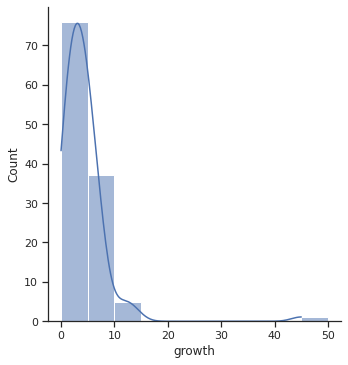

In [907]:
bins = [0,5,10,15,20,25,30,35,40,45,50]
ax1 = sns.displot(x=df_growth_Rate_list,bins=bins,kde=True)
ax1.set(xlabel="growth",ylabel="Count")


Histogram shows a right-skewed data which hints the use of median in the imputation process

Resetting the Real growth rating column in our data to be the processed real growth series

In [908]:
df_merge_2015_Exp_250Country["Real Growth Rating(%)"] = df_Real_Growth_Rating['Real Growth Rating(%)']
df_merge_2015_Exp_250Country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,nan,0.00,nan,35,57.40,0,97.00,nan,97.00,0.10,8989.84,8282396.00,0.40,0.30,0.94,16.00,Europe,Western Europe,8341600,41284.00,33.70,2.00,99.00,-0.4%.,3.00,7.48,79.70
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,nan,0.00,nan,0,61.00,0,92.00,nan,92.00,0.10,5734.44,33815.00,1.00,0.90,0.92,19.00,Europe,Northern Europe,334300,103000.00,nan,1.00,99.00,3.9%.,4.00,7.49,79.70
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,nan,0.00,nan,9,58.80,0,93.00,nan,93.00,0.10,5314.64,5683483.00,1.10,0.90,0.92,19.20,Europe,Northern Europe,5717014,43094.00,24.00,0.00,99.00,0.8%.,6.00,7.60,76.90
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,5.97,0.00,nan,14,61.20,0,95.00,nan,95.00,0.10,7455.25,518867.00,0.80,0.70,0.95,17.70,Europe,Northern Europe,5223256,323802.00,25.80,1.00,100.00,1.9%.,3.00,7.55,78.50
4,Canada,North America,5,7.43,0.04,1.33,1.32,0.91,0.63,0.33,0.46,2.45,2015,Developing,82.20,64.00,2,nan,0.00,55.00,195,67.00,2,91.00,nan,91.00,0.10,43315.74,3584861.00,0.60,0.50,0.92,16.30,Americas,Northern America,36155487,9984670.00,32.60,nan,nan,NaN,nan,7.28,79.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,19.10,83,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10,Asia,Southern Asia,27657145,652230.00,27.80,3.00,28.00,6.8% (2013 est.).,35.00,3.20,54.80
131,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,nan,0.00,98.00,1,21.40,15,99.00,nan,98.00,0.40,71.35,11629553.00,5.70,5.70,0.49,10.80,Africa,Eastern Africa,11553188,26338.00,50.80,7.00,71.00,5.9%.,30.58,3.33,48.30
132,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,nan,0.00,82.00,55,25.70,39,78.00,nan,82.00,1.00,783.95,1575952.00,6.90,6.80,0.48,10.70,Africa,Western Africa,10653654,112622.00,38.60,5.00,42.00,2.4%.,30.58,4.88,55.40
133,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,nan,0.00,94.00,9,18.70,31,94.00,nan,94.00,0.70,33.68,119927.00,7.30,7.20,0.41,10.60,Africa,Eastern Africa,10114505,27834.00,33.30,4.00,67.00,9.3%.,30.58,3.77,58.00


Sorting the median of the real growth data according to(Region & Status)

In [909]:
growth_grouped_by_region_dev = df_merge_2015_Exp_250Country.groupby(['Region','Status'])["Real Growth Rating(%)"].median()
growth_grouped_by_region_dev 

Region                           Status    
Australia and New Zealand        Developed     2.00
Central and Eastern Europe       Developed     1.00
                                 Developing    5.00
Eastern Asia                     Developed     2.00
                                 Developing   11.00
Latin America and Caribbean      Developing    3.00
Middle East and Northern Africa  Developing    3.00
North America                    Developing     nan
Southeastern Asia                Developed     4.00
                                 Developing    5.50
Southern Asia                    Developing    3.00
Sub-Saharan Africa               Developing    5.00
Western Europe                   Developed     0.00
                                 Developing    2.00
Name: Real Growth Rating(%), dtype: float64

Filling the missing values of the real growth rating using multivariate imputation on two variables (Region and Status) (Data Cleaning) (using the median)

In [910]:
for i in range(0,14):
  growth_region_nan_df = df_merge_2015_Exp_250Country[(df_merge_2015_Exp_250Country['Real Growth Rating(%)'].isna()) & (df_merge_2015_Exp_250Country['Region']==growth_grouped_by_region_dev.index[i][0])& (df_merge_2015_Exp_250Country['Status']==growth_grouped_by_region_dev.index[i][1])]
  growth_region_nan_df['Real Growth Rating(%)'] = growth_grouped_by_region_dev.values[i]
  df_merge_2015_Exp_250Country[(df_merge_2015_Exp_250Country['Real Growth Rating(%)'].isna()) & (df_merge_2015_Exp_250Country['Region']==growth_grouped_by_region_dev.index[i][0])& (df_merge_2015_Exp_250Country['Status']==growth_grouped_by_region_dev.index[i][1])]=growth_region_nan_df
df_merge_2015_Exp_250Country

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,nan,0.00,nan,35,57.40,0,97.00,nan,97.00,0.10,8989.84,8282396.00,0.40,0.30,0.94,16.00,Europe,Western Europe,8341600,41284.00,33.70,2.00,99.00,-0.4%.,3.00,7.48,79.70
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,nan,0.00,nan,0,61.00,0,92.00,nan,92.00,0.10,5734.44,33815.00,1.00,0.90,0.92,19.00,Europe,Northern Europe,334300,103000.00,nan,1.00,99.00,3.9%.,4.00,7.49,79.70
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,nan,0.00,nan,9,58.80,0,93.00,nan,93.00,0.10,5314.64,5683483.00,1.10,0.90,0.92,19.20,Europe,Northern Europe,5717014,43094.00,24.00,0.00,99.00,0.8%.,6.00,7.60,76.90
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,5.97,0.00,nan,14,61.20,0,95.00,nan,95.00,0.10,7455.25,518867.00,0.80,0.70,0.95,17.70,Europe,Northern Europe,5223256,323802.00,25.80,1.00,100.00,1.9%.,3.00,7.55,78.50
4,Canada,North America,5,7.43,0.04,1.33,1.32,0.91,0.63,0.33,0.46,2.45,2015,Developing,82.20,64.00,2,nan,0.00,55.00,195,67.00,2,91.00,nan,91.00,0.10,43315.74,3584861.00,0.60,0.50,0.92,16.30,Americas,Northern America,36155487,9984670.00,32.60,nan,nan,NaN,nan,7.28,79.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,19.10,83,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10,Asia,Southern Asia,27657145,652230.00,27.80,3.00,28.00,6.8% (2013 est.).,35.00,3.20,54.80
131,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,nan,0.00,98.00,1,21.40,15,99.00,nan,98.00,0.40,71.35,11629553.00,5.70,5.70,0.49,10.80,Africa,Eastern Africa,11553188,26338.00,50.80,7.00,71.00,5.9%.,30.58,3.33,48.30
132,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,nan,0.00,82.00,55,25.70,39,78.00,nan,82.00,1.00,783.95,1575952.00,6.90,6.80,0.48,10.70,Africa,Western Africa,10653654,112622.00,38.60,5.00,42.00,2.4%.,30.58,4.88,55.40
133,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,nan,0.00,94.00,9,18.70,31,94.00,nan,94.00,0.70,33.68,119927.00,7.30,7.20,0.41,10.60,Africa,Eastern Africa,10114505,27834.00,33.30,4.00,67.00,9.3%.,30.58,3.77,58.00


Viewing the rest of the missing values in our data (Data Exploring)

In [911]:
df_merge_2015_Exp_250Country.isnull().sum()

Country                              0
Region                               0
Happiness Rank                       0
Happiness Score                      0
Standard Error                       0
Economy (GDP per Capita)             0
Family                               0
Health (Life Expectancy)             0
Freedom                              0
Trust (Government Corruption)        0
Generosity                           0
Dystopia Residual                    0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            130
percentage expenditure               0
Hepatitis B                          8
Measles                              0
 BMI                                 1
under-five deaths                    0
Polio                                0
Total expenditure                  133
Diphtheria               

Viewing the inflation data (Data Exploring)

In [912]:
df_Inflation = df_merge_2015_Exp_250Country.loc[:,'Inflation(%)':'Inflation(%)']
df_Inflation

,Inflation(%)
0,-0.4%.
1,3.9%.
2,0.8%.
3,1.9%.
4,NaN
...,...
130,6.8% (2013 est.).
131,5.9%.
132,2.4%.
133,9.3%.


Extracting the numbers from the inflation data (Data Tidying)

In [913]:
df_Inflation['Inflation(%)'] = df_Inflation['Inflation(%)'].str.extract('([-\d\.]+)').astype(float)
df_Inflation

,Inflation(%)
0,-0.40
1,3.90
2,0.80
3,1.90
4,nan
...,...
130,6.80
131,5.90
132,2.40
133,9.30


Visualizing the distribution of the Inflation data

In [914]:
df_Inflation_list = df_Inflation['Inflation(%)'] .sort_values(ascending=True).values.tolist()

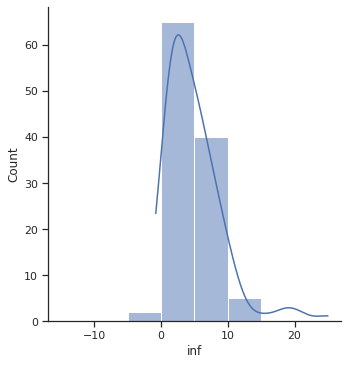

In [915]:
bins = [-15,-10,-5,0,5,10,15]
ax2 = sns.displot(x=df_Inflation_list,bins=bins,kde=True)
ax2.set(xlabel="inf",ylabel="Count")


Histogram shows normal distribution which hints the use of the mean measure in imouting the missing values

Resetting the Inflation column in our data to be the processed Inflation series

In [916]:
df_merge_2015_Exp_250Country['Inflation(%)'] = df_Inflation['Inflation(%)'] 
df_merge_2015_Exp_250Country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,nan,0.00,nan,35,57.40,0,97.00,nan,97.00,0.10,8989.84,8282396.00,0.40,0.30,0.94,16.00,Europe,Western Europe,8341600,41284.00,33.70,2.00,99.00,-0.40,3.00,7.48,79.70
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,nan,0.00,nan,0,61.00,0,92.00,nan,92.00,0.10,5734.44,33815.00,1.00,0.90,0.92,19.00,Europe,Northern Europe,334300,103000.00,nan,1.00,99.00,3.90,4.00,7.49,79.70
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,nan,0.00,nan,9,58.80,0,93.00,nan,93.00,0.10,5314.64,5683483.00,1.10,0.90,0.92,19.20,Europe,Northern Europe,5717014,43094.00,24.00,0.00,99.00,0.80,6.00,7.60,76.90
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,5.97,0.00,nan,14,61.20,0,95.00,nan,95.00,0.10,7455.25,518867.00,0.80,0.70,0.95,17.70,Europe,Northern Europe,5223256,323802.00,25.80,1.00,100.00,1.90,3.00,7.55,78.50
4,Canada,North America,5,7.43,0.04,1.33,1.32,0.91,0.63,0.33,0.46,2.45,2015,Developing,82.20,64.00,2,nan,0.00,55.00,195,67.00,2,91.00,nan,91.00,0.10,43315.74,3584861.00,0.60,0.50,0.92,16.30,Americas,Northern America,36155487,9984670.00,32.60,nan,nan,nan,nan,7.28,79.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,19.10,83,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10,Asia,Southern Asia,27657145,652230.00,27.80,3.00,28.00,6.80,35.00,3.20,54.80
131,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,nan,0.00,98.00,1,21.40,15,99.00,nan,98.00,0.40,71.35,11629553.00,5.70,5.70,0.49,10.80,Africa,Eastern Africa,11553188,26338.00,50.80,7.00,71.00,5.90,30.58,3.33,48.30
132,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,nan,0.00,82.00,55,25.70,39,78.00,nan,82.00,1.00,783.95,1575952.00,6.90,6.80,0.48,10.70,Africa,Western Africa,10653654,112622.00,38.60,5.00,42.00,2.40,30.58,4.88,55.40
133,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,nan,0.00,94.00,9,18.70,31,94.00,nan,94.00,0.70,33.68,119927.00,7.30,7.20,0.41,10.60,Africa,Eastern Africa,10114505,27834.00,33.30,4.00,67.00,9.30,30.58,3.77,58.00


Sorting the mean values of the inflation per (Status and Region)

In [917]:
Inf_grouped_by_region_dev = df_merge_2015_Exp_250Country.groupby(['Region','Status'])['Inflation(%)'].mean()
Inf_grouped_by_region_dev

Region                           Status    
Australia and New Zealand        Developed    1.85
Central and Eastern Europe       Developed    1.37
                                 Developing   5.55
Eastern Asia                     Developed    0.20
                                 Developing   8.20
Latin America and Caribbean      Developing   5.67
Middle East and Northern Africa  Developing   4.76
North America                    Developing    nan
Southeastern Asia                Developed    5.20
                                 Developing   3.97
Southern Asia                    Developing   8.13
Sub-Saharan Africa               Developing   6.99
Western Europe                   Developed    1.32
                                 Developing   0.40
Name: Inflation(%), dtype: float64

Filling the missing values of the inflation using multivariate imputation on two variables (Region and Status) (Data Cleaning) "using the mean as this data is normally distributed"

In [918]:
for i in range(0,14):
  inf_region_nan_df = df_merge_2015_Exp_250Country[(df_merge_2015_Exp_250Country['Inflation(%)'].isna()) & (df_merge_2015_Exp_250Country['Region']==Inf_grouped_by_region_dev.index[i][0])& (df_merge_2015_Exp_250Country['Status']==Inf_grouped_by_region_dev.index[i][1])]
  inf_region_nan_df['Inflation(%)'] = Inf_grouped_by_region_dev.values[i]
  df_merge_2015_Exp_250Country[(df_merge_2015_Exp_250Country['Inflation(%)'].isna()) & (df_merge_2015_Exp_250Country['Region']==Inf_grouped_by_region_dev.index[i][0])& (df_merge_2015_Exp_250Country['Status']==Inf_grouped_by_region_dev.index[i][1])]=inf_region_nan_df
df_merge_2015_Exp_250Country

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,nan,0.00,nan,35,57.40,0,97.00,nan,97.00,0.10,8989.84,8282396.00,0.40,0.30,0.94,16.00,Europe,Western Europe,8341600,41284.00,33.70,2.00,99.00,-0.40,3.00,7.48,79.70
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,nan,0.00,nan,0,61.00,0,92.00,nan,92.00,0.10,5734.44,33815.00,1.00,0.90,0.92,19.00,Europe,Northern Europe,334300,103000.00,nan,1.00,99.00,3.90,4.00,7.49,79.70
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,nan,0.00,nan,9,58.80,0,93.00,nan,93.00,0.10,5314.64,5683483.00,1.10,0.90,0.92,19.20,Europe,Northern Europe,5717014,43094.00,24.00,0.00,99.00,0.80,6.00,7.60,76.90
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,5.97,0.00,nan,14,61.20,0,95.00,nan,95.00,0.10,7455.25,518867.00,0.80,0.70,0.95,17.70,Europe,Northern Europe,5223256,323802.00,25.80,1.00,100.00,1.90,3.00,7.55,78.50
4,Canada,North America,5,7.43,0.04,1.33,1.32,0.91,0.63,0.33,0.46,2.45,2015,Developing,82.20,64.00,2,nan,0.00,55.00,195,67.00,2,91.00,nan,91.00,0.10,43315.74,3584861.00,0.60,0.50,0.92,16.30,Americas,Northern America,36155487,9984670.00,32.60,nan,nan,nan,nan,7.28,79.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,19.10,83,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10,Asia,Southern Asia,27657145,652230.00,27.80,3.00,28.00,6.80,35.00,3.20,54.80
131,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,nan,0.00,98.00,1,21.40,15,99.00,nan,98.00,0.40,71.35,11629553.00,5.70,5.70,0.49,10.80,Africa,Eastern Africa,11553188,26338.00,50.80,7.00,71.00,5.90,30.58,3.33,48.30
132,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,nan,0.00,82.00,55,25.70,39,78.00,nan,82.00,1.00,783.95,1575952.00,6.90,6.80,0.48,10.70,Africa,Western Africa,10653654,112622.00,38.60,5.00,42.00,2.40,30.58,4.88,55.40
133,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,nan,0.00,94.00,9,18.70,31,94.00,nan,94.00,0.70,33.68,119927.00,7.30,7.20,0.41,10.60,Africa,Eastern Africa,10114505,27834.00,33.30,4.00,67.00,9.30,30.58,3.77,58.00


Showing the remaining null values (Data Exploring)

In [919]:
df_merge_2015_Exp_250Country.isnull().sum() 

Country                              0
Region                               0
Happiness Rank                       0
Happiness Score                      0
Standard Error                       0
Economy (GDP per Capita)             0
Family                               0
Health (Life Expectancy)             0
Freedom                              0
Trust (Government Corruption)        0
Generosity                           0
Dystopia Residual                    0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            130
percentage expenditure               0
Hepatitis B                          8
Measles                              0
 BMI                                 1
under-five deaths                    0
Polio                                0
Total expenditure                  133
Diphtheria               

Dropping some columns for the following reasons
- Alcohol & Total Expenditure : having a very high number of missing values
- Population, Region & Subregion for being redundant and can be deduced from other columns 

In [920]:
df_merge_2015_Exp_250Country = df_merge_2015_Exp_250Country.drop(["Alcohol", "Total expenditure", "Population","region","subregion"], axis=1)
df_merge_2015_Exp_250Country.isnull().sum() 


Country                             0
Region                              0
Happiness Rank                      0
Happiness Score                     0
Standard Error                      0
Economy (GDP per Capita)            0
Family                              0
Health (Life Expectancy)            0
Freedom                             0
Trust (Government Corruption)       0
Generosity                          0
Dystopia Residual                   0
Year                                0
Status                              0
Life expectancy                     0
Adult Mortality                     0
infant deaths                       0
percentage expenditure              0
Hepatitis B                         8
Measles                             0
 BMI                                1
under-five deaths                   0
Polio                               0
Diphtheria                          0
 HIV/AIDS                           0
GDP                                 5
 thinness  1

Dropping the region of North America as it contains a lot of missig values(Only one compelete record which is Canada)

In [921]:
df_merge_2015_Exp_250Country = df_merge_2015_Exp_250Country[df_merge_2015_Exp_250Country['Region'] != "North America"]
df_merge_2015_Exp_250Country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,0.00,nan,35,57.40,0,97.00,97.00,0.10,8989.84,0.40,0.30,0.94,16.00,8341600,41284.00,33.70,2.00,99.00,-0.40,3.00,7.48,79.70
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,0.00,nan,0,61.00,0,92.00,92.00,0.10,5734.44,1.00,0.90,0.92,19.00,334300,103000.00,nan,1.00,99.00,3.90,4.00,7.49,79.70
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,0.00,nan,9,58.80,0,93.00,93.00,0.10,5314.64,1.10,0.90,0.92,19.20,5717014,43094.00,24.00,0.00,99.00,0.80,6.00,7.60,76.90
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,0.00,nan,14,61.20,0,95.00,95.00,0.10,7455.25,0.80,0.70,0.95,17.70,5223256,323802.00,25.80,1.00,100.00,1.90,3.00,7.55,78.50
5,Finland,Western Europe,6,7.41,0.03,1.29,1.32,0.89,0.64,0.41,0.23,2.62,2015,Developing,81.10,76.00,0,0.00,nan,2,62.10,0,97.00,97.00,0.10,4245.40,0.90,0.80,0.89,17.00,5491817,338424.00,26.90,2.00,100.00,1.30,8.00,7.77,77.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,71.28,65.00,1154,19.10,83,6.00,65.00,0.10,584.26,17.20,17.30,0.48,10.10,27657145,652230.00,27.80,3.00,28.00,6.80,35.00,3.20,54.80
131,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,0.00,98.00,1,21.40,15,99.00,98.00,0.40,71.35,5.70,5.70,0.49,10.80,11553188,26338.00,50.80,7.00,71.00,5.90,30.58,3.33,48.30
132,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,0.00,82.00,55,25.70,39,78.00,82.00,1.00,783.95,6.90,6.80,0.48,10.70,10653654,112622.00,38.60,5.00,42.00,2.40,30.58,4.88,55.40
133,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,0.00,94.00,9,18.70,31,94.00,94.00,0.70,33.68,7.30,7.20,0.41,10.60,10114505,27834.00,33.30,4.00,67.00,9.30,30.58,3.77,58.00


Viewing all the statistical measures for all features in our data (Data Exploring)

In [922]:
df_merge_2015_Exp_250Country.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000
count,134.00,134.00,134.00,134.00,134.00,134.00,134.00,134.00,134.00,134.00,134.00,134.00,134.00,134.00,134.00,126.00,134.00,133.00,134.00,134.00,134.00,134.00,129.00,133.00,133.00,134.00,134.00,134.00,134.00,121.00,134.00,134.00,134.00,134.00,134.00,134.00
mean,79.99,5.37,0.05,0.84,0.99,0.62,0.43,0.14,0.23,2.10,2015.00,72.00,150.36,27.90,3.26,81.98,1909.46,43.26,36.99,84.04,84.65,0.69,7481.40,4.56,4.58,0.70,13.14,46043366.68,633148.37,39.51,4.09,83.19,4.95,15.69,5.44,67.03
std,46.05,1.15,0.02,0.41,0.28,0.25,0.15,0.12,0.12,0.52,0.00,8.37,99.22,95.08,32.08,24.61,9107.30,20.50,122.23,22.90,22.36,1.45,12175.84,4.34,4.41,0.16,2.96,165098598.74,1369278.57,9.14,4.52,19.53,4.14,14.64,1.09,10.65
min,1.00,2.84,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.67,2015.00,51.00,1.00,0.00,0.00,6.00,0.00,2.50,0.00,6.00,6.00,0.10,33.68,0.30,0.20,0.35,5.40,334300.00,316.00,24.00,0.00,19.00,-0.80,0.00,3.08,39.00
25%,40.25,4.51,0.04,0.49,0.86,0.43,0.32,0.06,0.15,1.79,2015.00,66.03,72.50,0.00,0.00,78.75,0.00,24.20,1.00,84.00,84.25,0.10,743.77,1.50,1.50,0.55,10.95,4635713.50,52555.25,33.00,2.00,71.00,2.00,6.00,4.54,58.83
50%,81.50,5.19,0.04,0.91,1.04,0.70,0.44,0.11,0.21,2.09,2015.00,74.45,131.00,3.00,0.00,92.50,18.00,52.70,3.00,93.00,93.00,0.10,2878.34,3.00,3.10,0.74,13.25,10244663.50,198336.50,38.20,3.00,92.50,4.30,10.00,5.45,71.20
75%,120.50,6.24,0.05,1.15,1.22,0.80,0.55,0.18,0.30,2.45,2015.00,77.47,208.00,21.75,0.00,97.00,218.00,61.60,30.75,97.00,97.00,0.40,7388.98,6.40,6.20,0.83,15.28,30661937.00,599535.25,45.50,5.00,99.00,6.95,22.50,6.18,75.07
max,158.00,7.59,0.14,1.69,1.40,1.03,0.67,0.55,0.80,3.60,2015.00,88.00,484.00,910.00,364.98,99.00,90387.00,71.40,1100.00,99.00,99.00,9.30,66346.52,26.70,27.30,0.95,20.40,1377422166.00,9640011.00,64.30,45.00,100.00,25.00,85.00,7.77,81.10


Visualizing the distribution for the gini data (Visualization)

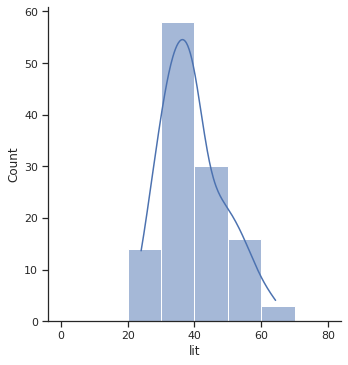

In [923]:
bins = [0, 10, 20,30,40,50,60,70,80]
df_gini_list = df_merge_2015_Exp_250Country['gini'] .sort_values(ascending=True).values.tolist()
ax = sns.displot(x=df_gini_list,bins=bins,kde=True)
ax.set(xlabel="lit",ylabel="Count")


Histogram shows normal distribution of the gini data which says that the mean measure will be used in imputing the missing values

Sorting the the mean values for the gini according to the region and the status of the country (1st step of imputing the missing values!)

In [924]:
gini_grouped_by_region_status = df_merge_2015_Exp_250Country.groupby(['Region','Status'])['gini'].mean()
gini_grouped_by_region_status

Region                           Status    
Australia and New Zealand        Developed    33.35
Central and Eastern Europe       Developed    32.07
                                 Developing   33.12
Eastern Asia                     Developed    38.10
                                 Developing   41.75
Latin America and Caribbean      Developing   49.66
Middle East and Northern Africa  Developing   37.17
Southeastern Asia                Developed    48.10
                                 Developing   40.22
Southern Asia                    Developing   33.50
Sub-Saharan Africa               Developing   44.36
Western Europe                   Developed    30.85
                                 Developing   31.30
Name: gini, dtype: float64

Filling the missing values using the mean values of gini according to region and status (multivariate imputation) (Data Cleaning)

In [925]:
for i in range(0,13):
  gini_region_nan_df = df_merge_2015_Exp_250Country[(df_merge_2015_Exp_250Country['gini'].isna()) & (df_merge_2015_Exp_250Country['Region']==gini_grouped_by_region_status.index[i][0])& (df_merge_2015_Exp_250Country['Status']==gini_grouped_by_region_status.index[i][1])]
  gini_region_nan_df['gini'] = gini_grouped_by_region_status.values[i]
  df_merge_2015_Exp_250Country[(df_merge_2015_Exp_250Country['gini'].isna()) & (df_merge_2015_Exp_250Country['Region']==gini_grouped_by_region_status.index[i][0])& (df_merge_2015_Exp_250Country['Status']==gini_grouped_by_region_status.index[i][1])]=gini_region_nan_df
df_merge_2015_Exp_250Country

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,0.00,nan,35,57.40,0,97.00,97.00,0.10,8989.84,0.40,0.30,0.94,16.00,8341600,41284.00,33.70,2.00,99.00,-0.40,3.00,7.48,79.70
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,0.00,nan,0,61.00,0,92.00,92.00,0.10,5734.44,1.00,0.90,0.92,19.00,334300,103000.00,30.85,1.00,99.00,3.90,4.00,7.49,79.70
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,0.00,nan,9,58.80,0,93.00,93.00,0.10,5314.64,1.10,0.90,0.92,19.20,5717014,43094.00,24.00,0.00,99.00,0.80,6.00,7.60,76.90
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,0.00,nan,14,61.20,0,95.00,95.00,0.10,7455.25,0.80,0.70,0.95,17.70,5223256,323802.00,25.80,1.00,100.00,1.90,3.00,7.55,78.50
5,Finland,Western Europe,6,7.41,0.03,1.29,1.32,0.89,0.64,0.41,0.23,2.62,2015,Developing,81.10,76.00,0,0.00,nan,2,62.10,0,97.00,97.00,0.10,4245.40,0.90,0.80,0.89,17.00,5491817,338424.00,26.90,2.00,100.00,1.30,8.00,7.77,77.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,71.28,65.00,1154,19.10,83,6.00,65.00,0.10,584.26,17.20,17.30,0.48,10.10,27657145,652230.00,27.80,3.00,28.00,6.80,35.00,3.20,54.80
131,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,0.00,98.00,1,21.40,15,99.00,98.00,0.40,71.35,5.70,5.70,0.49,10.80,11553188,26338.00,50.80,7.00,71.00,5.90,30.58,3.33,48.30
132,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,0.00,82.00,55,25.70,39,78.00,82.00,1.00,783.95,6.90,6.80,0.48,10.70,10653654,112622.00,38.60,5.00,42.00,2.40,30.58,4.88,55.40
133,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,0.00,94.00,9,18.70,31,94.00,94.00,0.70,33.68,7.30,7.20,0.41,10.60,10114505,27834.00,33.30,4.00,67.00,9.30,30.58,3.77,58.00


Reviewing the relation between column data (Exploring Data)

In [926]:
df_missing_gdp = df_merge_2015_Exp_250Country[["GDP", "Literacy Rate(%)", "Inflation(%)", "Unemployement(%)"]]
df_missing_gdp

,GDP,Literacy Rate(%),Inflation(%),Unemployement(%)
0,8989.84,99.00,-0.40,3.00
1,5734.44,99.00,3.90,4.00
2,5314.64,99.00,0.80,6.00
3,7455.25,100.00,1.90,3.00
5,4245.40,100.00,1.30,8.00
...,...,...,...,...
130,584.26,28.00,6.80,35.00
131,71.35,71.00,5.90,30.58
132,783.95,42.00,2.40,30.58
133,33.68,67.00,9.30,30.58


**Replacing the old GDP values with new GDP values using the dataset present in this link** : https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?end=2015&start=2015
**As the GDP data wasn't correct and can't be imputed.**

In [927]:
#MOSTAFA
df_merge_2015_Exp_250Country = pd.merge(df_merge_2015_Exp_250Country,df_GDP_per_capita , on='Country')
df_merge_2015_Exp_250Country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,2015
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,0.00,nan,35,57.40,0,97.00,97.00,0.10,8989.84,0.40,0.30,0.94,16.00,8341600,41284.00,33.70,2.00,99.00,-0.40,3.00,7.48,79.70,82081.60
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,0.00,nan,0,61.00,0,92.00,92.00,0.10,5734.44,1.00,0.90,0.92,19.00,334300,103000.00,30.85,1.00,99.00,3.90,4.00,7.49,79.70,52564.43
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,0.00,nan,9,58.80,0,93.00,93.00,0.10,5314.64,1.10,0.90,0.92,19.20,5717014,43094.00,24.00,0.00,99.00,0.80,6.00,7.60,76.90,53254.86
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,0.00,nan,14,61.20,0,95.00,95.00,0.10,7455.25,0.80,0.70,0.95,17.70,5223256,323802.00,25.80,1.00,100.00,1.90,3.00,7.55,78.50,74355.52
4,Finland,Western Europe,6,7.41,0.03,1.29,1.32,0.89,0.64,0.41,0.23,2.62,2015,Developing,81.10,76.00,0,0.00,nan,2,62.10,0,97.00,97.00,0.10,4245.40,0.90,0.80,0.89,17.00,5491817,338424.00,26.90,2.00,100.00,1.30,8.00,7.77,77.50,42784.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,71.28,65.00,1154,19.10,83,6.00,65.00,0.10,584.26,17.20,17.30,0.48,10.10,27657145,652230.00,27.80,3.00,28.00,6.80,35.00,3.20,54.80,578.47
125,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,0.00,98.00,1,21.40,15,99.00,98.00,0.40,71.35,5.70,5.70,0.49,10.80,11553188,26338.00,50.80,7.00,71.00,5.90,30.58,3.33,48.30,754.91
126,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,0.00,82.00,55,25.70,39,78.00,82.00,1.00,783.95,6.90,6.80,0.48,10.70,10653654,112622.00,38.60,5.00,42.00,2.40,30.58,4.88,55.40,1076.80
127,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,0.00,94.00,9,18.70,31,94.00,94.00,0.70,33.68,7.30,7.20,0.41,10.60,10114505,27834.00,33.30,4.00,67.00,9.30,30.58,3.77,58.00,305.55


We drop the old wrong GDP column, Then we add the new column values and convert it into numeric.

In [928]:
df_merge_2015_Exp_250Country.drop(["GDP"],axis=1,inplace=True)

In [929]:
df_merge_2015_Exp_250Country.rename(columns={"2015":"GDP"}, inplace=True)
df_merge_2015_Exp_250Country["GDP"] = pd.to_numeric(df_merge_2015_Exp_250Country["GDP"])
df_merge_2015_Exp_250Country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,0.00,nan,35,57.40,0,97.00,97.00,0.10,0.40,0.30,0.94,16.00,8341600,41284.00,33.70,2.00,99.00,-0.40,3.00,7.48,79.70,82081.60
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,0.00,nan,0,61.00,0,92.00,92.00,0.10,1.00,0.90,0.92,19.00,334300,103000.00,30.85,1.00,99.00,3.90,4.00,7.49,79.70,52564.43
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,0.00,nan,9,58.80,0,93.00,93.00,0.10,1.10,0.90,0.92,19.20,5717014,43094.00,24.00,0.00,99.00,0.80,6.00,7.60,76.90,53254.86
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,0.00,nan,14,61.20,0,95.00,95.00,0.10,0.80,0.70,0.95,17.70,5223256,323802.00,25.80,1.00,100.00,1.90,3.00,7.55,78.50,74355.52
4,Finland,Western Europe,6,7.41,0.03,1.29,1.32,0.89,0.64,0.41,0.23,2.62,2015,Developing,81.10,76.00,0,0.00,nan,2,62.10,0,97.00,97.00,0.10,0.90,0.80,0.89,17.00,5491817,338424.00,26.90,2.00,100.00,1.30,8.00,7.77,77.50,42784.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,71.28,65.00,1154,19.10,83,6.00,65.00,0.10,17.20,17.30,0.48,10.10,27657145,652230.00,27.80,3.00,28.00,6.80,35.00,3.20,54.80,578.47
125,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,0.00,98.00,1,21.40,15,99.00,98.00,0.40,5.70,5.70,0.49,10.80,11553188,26338.00,50.80,7.00,71.00,5.90,30.58,3.33,48.30,754.91
126,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,0.00,82.00,55,25.70,39,78.00,82.00,1.00,6.90,6.80,0.48,10.70,10653654,112622.00,38.60,5.00,42.00,2.40,30.58,4.88,55.40,1076.80
127,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,0.00,94.00,9,18.70,31,94.00,94.00,0.70,7.30,7.20,0.41,10.60,10114505,27834.00,33.30,4.00,67.00,9.30,30.58,3.77,58.00,305.55


In [930]:
df_merge_2015_Exp_250Country.isnull().sum()

Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                     0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
percentage expenditure             0
Hepatitis B                        8
Measles                            0
 BMI                               1
under-five deaths                  0
Polio                              0
Diphtheria                         0
 HIV/AIDS                          0
 thinness  1-19 years              1
 thinness 5-9 years                1
I

In [931]:
df_highest_thiness = df_merge_2015_Exp_250Country[(df_merge_2015_Exp_250Country['Region']=='Sub-Saharan Africa')]


Exploring the distribution of the thinness(1-19) data (Visualization)

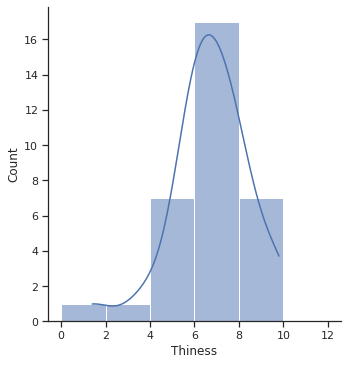

In [932]:
bins2 = [0, 2, 4,6,8,10,12]
df_Thiness_list = df_highest_thiness[' thinness  1-19 years'] .sort_values(ascending=True).values.tolist()
ax4 = sns.displot(x=df_Thiness_list,bins=bins2,kde=True)
ax4.set(xlabel="Thiness",ylabel="Count")

Histogram shows normal distribution -> Imputation using mean

Exploring the distribution of the thinness(5-9) data (Visualization)

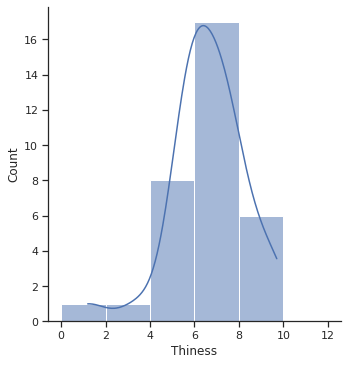

In [933]:
bins2 = [0, 2, 4,6,8,10,12]
df_Thiness_list_5_9 = df_highest_thiness[' thinness 5-9 years'] .sort_values(ascending=True).values.tolist()
ax5 = sns.displot(x=df_Thiness_list_5_9,bins=bins2,kde=True)
ax5.set(xlabel="Thiness",ylabel="Count")

Histogram shows normal distribution of the data -> Imputation using mean

Assigning the thinness of Sudan to be of the average (Filling missingvalues )(Data Cleanimg)

In [934]:
Thiness1_19mean=df_highest_thiness[' thinness  1-19 years'].mean()
Thiness5_9mean =df_highest_thiness[' thinness 5-9 years'].mean()
df_merge_2015_Exp_250Country[' thinness  1-19 years'].loc[(df_merge_2015_Exp_250Country['Country'] == "Sudan")]=Thiness1_19mean
df_merge_2015_Exp_250Country[' thinness 5-9 years'].loc[(df_merge_2015_Exp_250Country['Country'] == "Sudan")]=Thiness5_9mean
df_merge_2015_Exp_250Country[df_merge_2015_Exp_250Country['Country']=="Sudan"]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP
95,Sudan,Sub-Saharan Africa,118,4.55,0.07,0.52,1.01,0.37,0.10,0.15,0.19,2.21,2015,Developing,64.10,225.00,58,0.00,93.00,3585,nan,85,93.00,93.00,0.30,6.73,6.62,0.49,7.20,39598700,1886068.00,35.30,3.00,71.00,25.00,20.00,5.45,58.60,1909.74


In [935]:
df_Region_Bmi = df_merge_2015_Exp_250Country[(df_merge_2015_Exp_250Country['Region']=='Sub-Saharan Africa')]
df_Region_Bmi

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP
57,Mauritius,Sub-Saharan Africa,71,5.48,0.07,1.01,0.99,0.71,0.56,0.08,0.38,1.76,2015,Developing,74.60,146.00,0,0.00,97.00,0,33.30,0,98.00,97.00,0.10,6.90,6.80,0.78,15.20,1262879,2040.00,44.36,3.00,88.00,3.50,8.00,5.89,71.00,9260.45
61,Nigeria,Sub-Saharan Africa,78,5.27,0.04,0.65,0.90,0.16,0.34,0.04,0.27,2.89,2015,Developing,54.50,344.00,483,0.00,49.00,12423,25.40,747,49.00,49.00,3.70,9.80,9.70,0.53,10.00,186988000,923768.00,48.80,6.00,61.00,8.70,23.00,5.26,47.10,2730.43
68,Zambia,Sub-Saharan Africa,85,5.13,0.07,0.47,0.92,0.30,0.49,0.12,0.20,2.63,2015,Developing,61.80,33.00,27,0.00,9.00,9,23.40,40,9.00,9.00,4.10,6.30,6.10,0.58,12.50,15933883,752612.00,54.60,6.00,61.00,7.10,15.00,4.11,43.80,1337.80
75,Mozambique,Sub-Saharan Africa,94,4.97,0.08,0.08,1.03,0.09,0.34,0.16,0.22,3.05,2015,Developing,57.60,355.00,60,0.00,8.00,79,22.60,81,8.00,8.00,3.90,3.60,3.50,0.41,9.10,26423700,801590.00,45.70,7.00,56.00,4.40,17.00,4.47,49.00,589.86
78,Lesotho,Sub-Saharan Africa,97,4.90,0.09,0.38,1.04,0.08,0.32,0.13,0.16,2.80,2015,Developing,53.70,484.00,4,0.00,93.00,0,32.60,6,9.00,93.00,9.30,5.50,5.30,0.49,10.70,1894194,30355.00,52.50,4.00,89.00,5.00,25.00,3.80,49.30,1152.14
90,South Africa,Sub-Saharan Africa,113,4.64,0.05,0.92,1.18,0.28,0.33,0.09,0.12,1.72,2015,Developing,62.90,328.00,42,0.00,75.00,17,51.10,52,75.00,75.00,3.60,4.40,5.30,0.67,13.00,55653654,1221037.00,63.10,5.00,93.00,6.99,30.58,4.72,57.30,5734.63
91,Ghana,Sub-Saharan Africa,114,4.63,0.05,0.55,0.68,0.40,0.42,0.04,0.23,2.31,2015,Developing,62.40,249.00,37,0.00,88.00,23,28.60,52,88.00,88.00,0.70,6.20,6.10,0.57,11.40,27670174,238533.00,42.80,7.00,71.00,11.00,11.00,5.00,57.20,1743.85
92,Zimbabwe,Sub-Saharan Africa,115,4.61,0.04,0.27,1.03,0.33,0.26,0.08,0.19,2.44,2015,Developing,67.00,336.00,22,0.00,87.00,0,31.80,32,88.00,87.00,6.20,5.60,5.50,0.51,10.30,14240168,390757.00,44.36,5.00,64.00,6.99,30.58,3.66,46.00,1445.07
93,Liberia,Sub-Saharan Africa,116,4.57,0.11,0.07,0.79,0.34,0.29,0.06,0.24,2.78,2015,Developing,61.40,259.00,8,0.00,52.00,1060,27.30,11,52.00,52.00,0.90,6.50,6.40,0.43,9.90,4615000,111369.00,38.20,8.00,60.00,5.20,85.00,3.98,51.90,710.38
95,Sudan,Sub-Saharan Africa,118,4.55,0.07,0.52,1.01,0.37,0.10,0.15,0.19,2.21,2015,Developing,64.10,225.00,58,0.00,93.00,3585,nan,85,93.00,93.00,0.30,6.73,6.62,0.49,7.20,39598700,1886068.00,35.30,3.00,71.00,25.00,20.00,5.45,58.60,1909.74


Showing the distribution of the BMI data (Visualization)

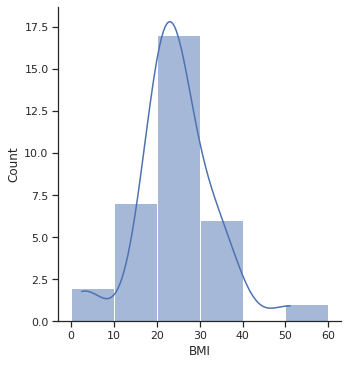

In [936]:
bins2 = [0,10,20,30,40,50,60]
df_BMI_list = df_Region_Bmi[' BMI '] .sort_values(ascending=True).values.tolist()
ax5 = sns.displot(x=df_BMI_list,bins=bins2,kde=True)
ax5.set(xlabel="BMI",ylabel="Count")

Histogram shows normal distribution of the data -> Imputation using mean

assigning the bmi of Sudan to be of the average

In [937]:
Region_BMI_mean=df_Region_Bmi[' BMI '].mean()

df_merge_2015_Exp_250Country[' BMI '].loc[(df_merge_2015_Exp_250Country['Country'] == "Sudan")]=Region_BMI_mean
df_merge_2015_Exp_250Country[df_merge_2015_Exp_250Country['Country']=="Sudan"]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP
95,Sudan,Sub-Saharan Africa,118,4.55,0.07,0.52,1.01,0.37,0.10,0.15,0.19,2.21,2015,Developing,64.10,225.00,58,0.00,93.00,3585,24.61,85,93.00,93.00,0.30,6.73,6.62,0.49,7.20,39598700,1886068.00,35.30,3.00,71.00,25.00,20.00,5.45,58.60,1909.74


Checking if there's more missing data values



In [938]:
df_merge_2015_Exp_250Country.isna().sum()

Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                     0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
percentage expenditure             0
Hepatitis B                        8
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Diphtheria                         0
 HIV/AIDS                          0
 thinness  1-19 years              0
 thinness 5-9 years                0
I

Exploring the Hepatitis B column

In [939]:
df_Hepatitis = df_merge_2015_Exp_250Country.loc[:,'Hepatitis B':'Hepatitis B']
df_Hepatitis

,Hepatitis B
0,nan
1,nan
2,nan
3,nan
4,nan
...,...
124,65.00
125,98.00
126,82.00
127,94.00


Viewing the distribution of the Hepatitis B data

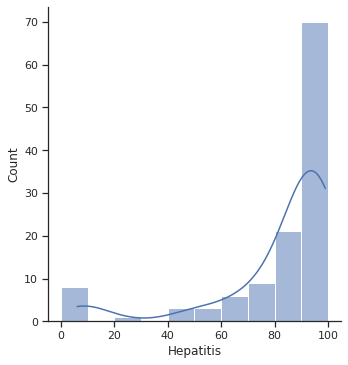

In [940]:
bins2 = [0,10,20,30,40,50,60,70,80,90,100]
df_Hepatitis_list = df_Hepatitis['Hepatitis B'] .sort_values(ascending=True).values.tolist()
ax6 = sns.displot(x=df_Hepatitis_list,bins=bins2,kde=True)
ax6.set(xlabel="Hepatitis",ylabel="Count")

Left-Skewed Histogram -> Imputation using the median

Sorting the median of the Hepatitis B data using the Region (1st step of the Imputation process)

In [941]:
Hep_grouped_by_region_status = df_merge_2015_Exp_250Country.groupby(['Region'])['Hepatitis B'].median()
Hep_grouped_by_region_status

Region
Australia and New Zealand         92.50
Central and Eastern Europe        94.00
Eastern Asia                      99.00
Latin America and Caribbean       91.00
Middle East and Northern Africa   98.00
Southeastern Asia                 89.00
Southern Asia                     91.00
Sub-Saharan Africa                83.00
Western Europe                    94.50
Name: Hepatitis B, dtype: float64

Filling the missing data using using multivariate imputation on region (using median as the data is skewed)(Data Cleaning)

In [942]:
for i in range(0,9):
  Hep_region_nan_df = df_merge_2015_Exp_250Country[(df_merge_2015_Exp_250Country['Hepatitis B'].isna()) & (df_merge_2015_Exp_250Country['Region']==Hep_grouped_by_region_status.index[i])]
  Hep_region_nan_df['Hepatitis B'] = Hep_grouped_by_region_status.values[i]
  df_merge_2015_Exp_250Country[(df_merge_2015_Exp_250Country['Hepatitis B'].isna()) & (df_merge_2015_Exp_250Country['Region']==Hep_grouped_by_region_status.index[i])]=Hep_region_nan_df
df_merge_2015_Exp_250Country

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,0.00,94.50,35,57.40,0,97.00,97.00,0.10,0.40,0.30,0.94,16.00,8341600,41284.00,33.70,2.00,99.00,-0.40,3.00,7.48,79.70,82081.60
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,0.00,94.50,0,61.00,0,92.00,92.00,0.10,1.00,0.90,0.92,19.00,334300,103000.00,30.85,1.00,99.00,3.90,4.00,7.49,79.70,52564.43
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,0.00,94.50,9,58.80,0,93.00,93.00,0.10,1.10,0.90,0.92,19.20,5717014,43094.00,24.00,0.00,99.00,0.80,6.00,7.60,76.90,53254.86
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,0.00,94.50,14,61.20,0,95.00,95.00,0.10,0.80,0.70,0.95,17.70,5223256,323802.00,25.80,1.00,100.00,1.90,3.00,7.55,78.50,74355.52
4,Finland,Western Europe,6,7.41,0.03,1.29,1.32,0.89,0.64,0.41,0.23,2.62,2015,Developing,81.10,76.00,0,0.00,94.50,2,62.10,0,97.00,97.00,0.10,0.90,0.80,0.89,17.00,5491817,338424.00,26.90,2.00,100.00,1.30,8.00,7.77,77.50,42784.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,71.28,65.00,1154,19.10,83,6.00,65.00,0.10,17.20,17.30,0.48,10.10,27657145,652230.00,27.80,3.00,28.00,6.80,35.00,3.20,54.80,578.47
125,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,0.00,98.00,1,21.40,15,99.00,98.00,0.40,5.70,5.70,0.49,10.80,11553188,26338.00,50.80,7.00,71.00,5.90,30.58,3.33,48.30,754.91
126,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,0.00,82.00,55,25.70,39,78.00,82.00,1.00,6.90,6.80,0.48,10.70,10653654,112622.00,38.60,5.00,42.00,2.40,30.58,4.88,55.40,1076.80
127,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,0.00,94.00,9,18.70,31,94.00,94.00,0.70,7.30,7.20,0.41,10.60,10114505,27834.00,33.30,4.00,67.00,9.30,30.58,3.77,58.00,305.55


In [943]:
df_merge_2015_Exp_250Country[df_merge_2015_Exp_250Country['under-five deaths ']==0]['under-five deaths '].count()

32

In [944]:
df_merge_2015_Exp_250Country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,0.00,94.50,35,57.40,0,97.00,97.00,0.10,0.40,0.30,0.94,16.00,8341600,41284.00,33.70,2.00,99.00,-0.40,3.00,7.48,79.70,82081.60
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,0.00,94.50,0,61.00,0,92.00,92.00,0.10,1.00,0.90,0.92,19.00,334300,103000.00,30.85,1.00,99.00,3.90,4.00,7.49,79.70,52564.43
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,0.00,94.50,9,58.80,0,93.00,93.00,0.10,1.10,0.90,0.92,19.20,5717014,43094.00,24.00,0.00,99.00,0.80,6.00,7.60,76.90,53254.86
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,0.00,94.50,14,61.20,0,95.00,95.00,0.10,0.80,0.70,0.95,17.70,5223256,323802.00,25.80,1.00,100.00,1.90,3.00,7.55,78.50,74355.52
4,Finland,Western Europe,6,7.41,0.03,1.29,1.32,0.89,0.64,0.41,0.23,2.62,2015,Developing,81.10,76.00,0,0.00,94.50,2,62.10,0,97.00,97.00,0.10,0.90,0.80,0.89,17.00,5491817,338424.00,26.90,2.00,100.00,1.30,8.00,7.77,77.50,42784.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,71.28,65.00,1154,19.10,83,6.00,65.00,0.10,17.20,17.30,0.48,10.10,27657145,652230.00,27.80,3.00,28.00,6.80,35.00,3.20,54.80,578.47
125,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,0.00,98.00,1,21.40,15,99.00,98.00,0.40,5.70,5.70,0.49,10.80,11553188,26338.00,50.80,7.00,71.00,5.90,30.58,3.33,48.30,754.91
126,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,0.00,82.00,55,25.70,39,78.00,82.00,1.00,6.90,6.80,0.48,10.70,10653654,112622.00,38.60,5.00,42.00,2.40,30.58,4.88,55.40,1076.80
127,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,0.00,94.00,9,18.70,31,94.00,94.00,0.70,7.30,7.20,0.41,10.60,10114505,27834.00,33.30,4.00,67.00,9.30,30.58,3.77,58.00,305.55


**Handling Outliers:**

In [945]:
df_merge_2015_Exp_250Country_o1 = df_merge_2015_Exp_250Country

Q1 = df_merge_2015_Exp_250Country_o1.quantile(0.25)
Q3 = df_merge_2015_Exp_250Country_o1.quantile(0.75)
IQR = Q3 - Q1
print(df_merge_2015_Exp_250Country_o1 < (Q1 - 1.5 * IQR)) or (df_merge_2015_Exp_250Country_o1 > (Q3 + 1.5 * IQR))

      BMI    HIV/AIDS  ...  population  under-five deaths 
0    False      False  ...       False               False
1    False      False  ...       False               False
2    False      False  ...       False               False
3    False      False  ...       False               False
4    False      False  ...       False               False
..     ...        ...  ...         ...                 ...
124  False      False  ...       False               False
125  False      False  ...       False               False
126  False      False  ...       False               False
127  False      False  ...       False               False
128  False      False  ...       False               False

[129 rows x 39 columns]


,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Country,Diphtheria,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,GDP,Generosity,Happiness Rank,Happiness Score,Happiness Score 2019,Health (Life Expectancy),Hepatitis B,Income composition of resources,Inflation(%),Life expectancy,Life expectancy 2000,Literacy Rate(%),Measles,Polio,Real Growth Rating(%),Region,Schooling,Standard Error,Status,Trust (Government Corruption),Unemployement(%),Year,area,gini,infant deaths,percentage expenditure,population,under-five deaths
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True
125,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
126,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
127,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


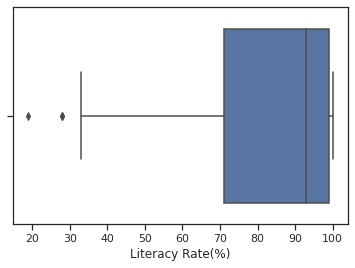

In [946]:
sns.boxplot(x=df_merge_2015_Exp_250Country['Literacy Rate(%)'])

In [947]:
Q1 = df_merge_2015_Exp_250Country['Literacy Rate(%)'].quantile(0.25)
Q3 = df_merge_2015_Exp_250Country['Literacy Rate(%)'].quantile(0.75)
IQR = Q3 - Q1
df_merge_2015_Exp_250Country[df_merge_2015_Exp_250Country['Literacy Rate(%)'] < Q1-1.5*IQR]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP
117,Niger,Sub-Saharan Africa,144,3.85,0.04,0.07,0.77,0.30,0.48,0.16,0.19,1.88,2015,Developing,61.80,22.00,49,0.00,65.00,7693,19.30,87,65.00,65.00,0.40,9.60,9.40,0.35,5.40,20715000,1267000.00,34.60,5.00,19.00,6.99,30.58,4.63,50.00,483.34
123,Burkina Faso,Sub-Saharan Africa,152,3.59,0.04,0.26,0.85,0.27,0.39,0.13,0.22,1.46,2015,Developing,59.90,26.00,38,0.00,91.00,99,19.40,61,91.00,91.00,0.60,8.00,7.50,0.40,7.70,19034397,272967.00,39.80,6.00,28.00,2.10,77.00,4.59,51.00,653.33
124,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,71.28,65.00,1154,19.10,83,6.00,65.00,0.10,17.20,17.30,0.48,10.10,27657145,652230.00,27.80,3.00,28.00,6.80,35.00,3.20,54.80,578.47


**Decision: We will keep the outliers for the literacy rate because they are correct values**

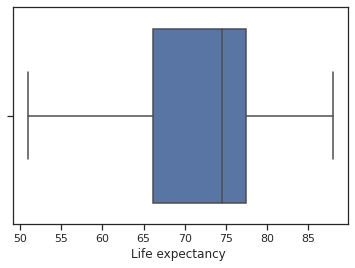

In [948]:
sns.boxplot(x=df_merge_2015_Exp_250Country['Life expectancy '])

**Decision: No Outliers**

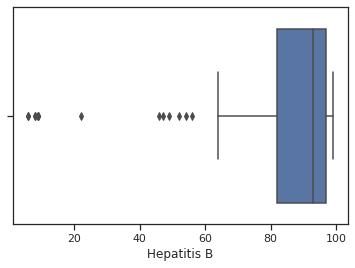

In [949]:
sns.boxplot(x=df_merge_2015_Exp_250Country['Hepatitis B'])

In [950]:
Q1 = df_merge_2015_Exp_250Country['Hepatitis B'].quantile(0.25)
Q3 = df_merge_2015_Exp_250Country['Hepatitis B'].quantile(0.75)
IQR = Q3 - Q1
df_merge_2015_Exp_250Country[df_merge_2015_Exp_250Country['Hepatitis B'] < Q1-1.5*IQR]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP
34,Trinidad and Tobago,Latin America and Caribbean,41,6.17,0.11,1.21,1.18,0.61,0.56,0.01,0.32,2.27,2015,Developing,71.20,17.00,0,0.00,9.00,0,47.10,0,88.00,96.00,0.30,5.70,5.90,0.78,12.70,1349667,5130.00,40.30,1.00,98.00,5.40,5.00,5.45,69.10,18289.70
47,Peru,Latin America and Caribbean,58,5.82,0.05,0.90,0.97,0.73,0.41,0.06,0.15,2.59,2015,Developing,75.50,123.00,8,0.00,9.00,4,55.60,10,88.00,9.00,0.10,1.10,1.10,0.74,13.40,31488700,1285216.00,48.10,3.00,94.00,5.67,8.38,5.70,71.40,6229.10
61,Nigeria,Sub-Saharan Africa,78,5.27,0.04,0.65,0.90,0.16,0.34,0.04,0.27,2.89,2015,Developing,54.50,344.00,483,0.00,49.00,12423,25.40,747,49.00,49.00,3.70,9.80,9.70,0.53,10.00,186988000,923768.00,48.80,6.00,61.00,8.70,23.00,5.26,47.10,2730.43
68,Zambia,Sub-Saharan Africa,85,5.13,0.07,0.47,0.92,0.30,0.49,0.12,0.20,2.63,2015,Developing,61.80,33.00,27,0.00,9.00,9,23.40,40,9.00,9.00,4.10,6.30,6.10,0.58,12.50,15933883,752612.00,54.60,6.00,61.00,7.10,15.00,4.11,43.80,1337.80
69,Romania,Central and Eastern Europe,86,5.12,0.07,1.04,0.89,0.77,0.35,0.01,0.14,1.93,2015,Developed,75.00,133.00,2,0.00,9.00,4,6.70,2,89.00,89.00,0.10,2.50,2.70,0.80,14.70,19861408,238391.00,30.00,1.00,99.00,1.37,13.15,6.07,77.00,8977.44
73,Philippines,Southeastern Asia,90,5.07,0.05,0.71,1.04,0.58,0.63,0.12,0.25,1.75,2015,Developing,68.50,211.00,52,0.00,6.00,619,25.40,66,79.00,6.00,0.10,1.00,9.70,0.68,11.70,103279800,342353.00,43.00,6.00,95.00,2.80,7.00,5.63,66.80,3001.04
75,Mozambique,Sub-Saharan Africa,94,4.97,0.08,0.08,1.03,0.09,0.34,0.16,0.22,3.05,2015,Developing,57.60,355.00,60,0.00,8.00,79,22.60,81,8.00,8.00,3.90,3.60,3.50,0.41,9.10,26423700,801590.00,45.70,7.00,56.00,4.40,17.00,4.47,49.00,589.86
88,Ukraine,Central and Eastern Europe,111,4.68,0.04,0.80,1.20,0.67,0.25,0.03,0.15,1.57,2015,Developing,71.30,195.00,4,0.00,22.00,105,61.30,5,51.00,23.00,0.20,2.30,2.40,0.75,15.30,42692393,603700.00,26.40,0.00,99.00,0.70,8.00,4.33,67.50,2124.66
89,Iraq,Middle East and Northern Africa,112,4.68,0.05,0.99,0.82,0.60,0.00,0.14,0.18,1.95,2015,Developing,68.90,182.00,32,0.00,56.00,1433,59.10,38,63.00,58.00,0.10,5.30,5.10,0.65,10.10,37883543,438317.00,30.90,4.00,78.00,2.00,16.00,4.44,70.00,4989.80
93,Liberia,Sub-Saharan Africa,116,4.57,0.11,0.07,0.79,0.34,0.29,0.06,0.24,2.78,2015,Developing,61.40,259.00,8,0.00,52.00,1060,27.30,11,52.00,52.00,0.90,6.50,6.40,0.43,9.90,4615000,111369.00,38.20,8.00,60.00,5.20,85.00,3.98,51.90,710.38


**Decision: The values are correct, Most of the outliers countries are "developing" which explains why the "Hepatitis B" immunization is low among them.**

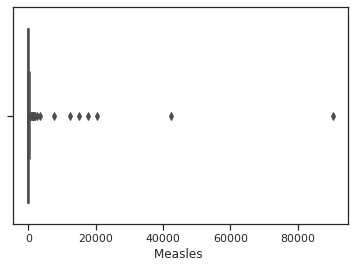

In [951]:

sns.boxplot(x=df_merge_2015_Exp_250Country['Measles '])

In [952]:
Q1 = df_merge_2015_Exp_250Country['Measles '].quantile(0.25)
Q3 = df_merge_2015_Exp_250Country['Measles '].quantile(0.75)
IQR = Q3 - Q1
df_merge_2015_Exp_250Country[df_merge_2015_Exp_250Country['Measles '] > Q3+1.5*IQR]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP
21,Germany,Western Europe,26,6.75,0.02,1.33,1.30,0.89,0.61,0.22,0.28,2.12,2015,Developed,81.00,68.00,2,0.00,88.00,2464,62.30,3,94.00,95.00,0.10,1.10,1.10,0.92,17.10,81770900,357114.00,28.30,0.00,99.00,1.60,6.00,6.99,78.00,41139.54
50,Malaysia,Southeastern Asia,61,5.77,0.04,1.12,1.07,0.72,0.53,0.11,0.33,1.89,2015,Developing,75.00,123.00,4,0.00,99.00,1318,4.60,4,99.00,99.00,0.10,7.50,7.30,0.79,13.10,31405416,330803.00,46.20,4.00,93.00,2.20,3.00,5.34,72.40,9955.24
59,Indonesia,Southeastern Asia,74,5.40,0.03,0.83,1.09,0.64,0.47,0.00,0.52,1.86,2015,Developing,69.10,176.00,114,0.00,78.00,15099,27.40,136,8.00,78.00,0.30,1.40,1.20,0.69,12.90,258705000,1904569.00,34.00,5.00,92.00,7.70,6.00,5.19,66.30,3331.70
61,Nigeria,Sub-Saharan Africa,78,5.27,0.04,0.65,0.90,0.16,0.34,0.04,0.27,2.89,2015,Developing,54.50,344.00,483,0.00,49.00,12423,25.40,747,49.00,49.00,3.70,9.80,9.70,0.53,10.00,186988000,923768.00,48.80,6.00,61.00,8.70,23.00,5.26,47.10,2730.43
67,China,Eastern Asia,84,5.14,0.02,0.89,0.95,0.82,0.52,0.03,0.08,1.86,2015,Developing,76.10,85.00,157,0.00,99.00,42361,32.90,183,99.00,99.00,0.10,3.60,2.90,0.73,13.50,1377422166,9640011.00,47.00,11.00,97.00,8.20,6.50,5.19,71.70,8066.94
73,Philippines,Southeastern Asia,90,5.07,0.05,0.71,1.04,0.58,0.63,0.12,0.25,1.75,2015,Developing,68.50,211.00,52,0.00,6.00,619,25.40,66,79.00,6.00,0.10,1.00,9.70,0.68,11.70,103279800,342353.00,43.00,6.00,95.00,2.80,7.00,5.63,66.80,3001.04
77,Bosnia and Herzegovina,Central and Eastern Europe,96,4.95,0.07,0.83,0.92,0.79,0.09,0.00,0.25,2.06,2015,Developing,77.40,88.00,0,0.00,82.00,1677,55.80,0,74.00,82.00,0.10,2.30,2.30,0.75,14.20,3531159,51209.00,36.20,5.00,99.00,5.55,13.15,5.39,74.60,4727.28
80,Mongolia,Eastern Asia,100,4.87,0.03,0.83,1.30,0.60,0.44,0.03,0.33,1.35,2015,Developing,68.80,222.00,1,0.00,99.00,20359,52.70,1,99.00,99.00,0.10,2.20,2.30,0.73,14.80,3093100,1564110.00,36.50,11.00,97.00,8.20,9.00,5.29,62.80,3918.58
89,Iraq,Middle East and Northern Africa,112,4.68,0.05,0.99,0.82,0.60,0.00,0.14,0.18,1.95,2015,Developing,68.90,182.00,32,0.00,56.00,1433,59.10,38,63.00,58.00,0.10,5.30,5.10,0.65,10.10,37883543,438317.00,30.90,4.00,78.00,2.00,16.00,4.44,70.00,4989.80
93,Liberia,Sub-Saharan Africa,116,4.57,0.11,0.07,0.79,0.34,0.29,0.06,0.24,2.78,2015,Developing,61.40,259.00,8,0.00,52.00,1060,27.30,11,52.00,52.00,0.90,6.50,6.40,0.43,9.90,4615000,111369.00,38.20,8.00,60.00,5.20,85.00,3.98,51.90,710.38


**Decision: The values are correct, Most of the outliers countries are "developing" which explains why the number of the reported cases for "Measles" are high among them. For India and China the numbers are extreme as they are the highest populated countiers in the world.**

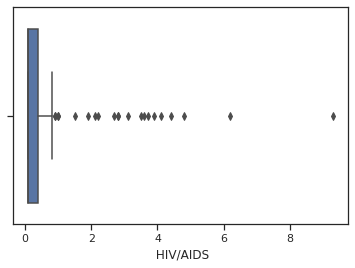

In [953]:
sns.boxplot(x=df_merge_2015_Exp_250Country[' HIV/AIDS'])

In [954]:
Q1 = df_merge_2015_Exp_250Country[' HIV/AIDS'].quantile(0.25)
Q3 = df_merge_2015_Exp_250Country[' HIV/AIDS'].quantile(0.75)
IQR = Q3 - Q1
df_merge_2015_Exp_250Country[df_merge_2015_Exp_250Country[' HIV/AIDS'] > Q3+1.5*IQR]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP
61,Nigeria,Sub-Saharan Africa,78,5.27,0.04,0.65,0.90,0.16,0.34,0.04,0.27,2.89,2015,Developing,54.50,344.00,483,0.00,49.00,12423,25.40,747,49.00,49.00,3.70,9.80,9.70,0.53,10.00,186988000,923768.00,48.80,6.00,61.00,8.70,23.00,5.26,47.10,2730.43
68,Zambia,Sub-Saharan Africa,85,5.13,0.07,0.47,0.92,0.30,0.49,0.12,0.20,2.63,2015,Developing,61.80,33.00,27,0.00,9.00,9,23.40,40,9.00,9.00,4.10,6.30,6.10,0.58,12.50,15933883,752612.00,54.60,6.00,61.00,7.10,15.00,4.11,43.80,1337.80
75,Mozambique,Sub-Saharan Africa,94,4.97,0.08,0.08,1.03,0.09,0.34,0.16,0.22,3.05,2015,Developing,57.60,355.00,60,0.00,8.00,79,22.60,81,8.00,8.00,3.90,3.60,3.50,0.41,9.10,26423700,801590.00,45.70,7.00,56.00,4.40,17.00,4.47,49.00,589.86
78,Lesotho,Sub-Saharan Africa,97,4.90,0.09,0.38,1.04,0.08,0.32,0.13,0.16,2.80,2015,Developing,53.70,484.00,4,0.00,93.00,0,32.60,6,9.00,93.00,9.30,5.50,5.30,0.49,10.70,1894194,30355.00,52.50,4.00,89.00,5.00,25.00,3.80,49.30,1152.14
90,South Africa,Sub-Saharan Africa,113,4.64,0.05,0.92,1.18,0.28,0.33,0.09,0.12,1.72,2015,Developing,62.90,328.00,42,0.00,75.00,17,51.10,52,75.00,75.00,3.60,4.40,5.30,0.67,13.00,55653654,1221037.00,63.10,5.00,93.00,6.99,30.58,4.72,57.30,5734.63
92,Zimbabwe,Sub-Saharan Africa,115,4.61,0.04,0.27,1.03,0.33,0.26,0.08,0.19,2.44,2015,Developing,67.00,336.00,22,0.00,87.00,0,31.80,32,88.00,87.00,6.20,5.60,5.50,0.51,10.30,14240168,390757.00,44.36,5.00,64.00,6.99,30.58,3.66,46.00,1445.07
93,Liberia,Sub-Saharan Africa,116,4.57,0.11,0.07,0.79,0.34,0.29,0.06,0.24,2.78,2015,Developing,61.40,259.00,8,0.00,52.00,1060,27.30,11,52.00,52.00,0.90,6.50,6.40,0.43,9.90,4615000,111369.00,38.20,8.00,60.00,5.20,85.00,3.98,51.90,710.38
100,Mauritania,Sub-Saharan Africa,124,4.44,0.04,0.45,0.87,0.36,0.24,0.17,0.22,2.12,2015,Developing,63.10,25.00,8,0.00,73.00,1,3.80,12,67.00,73.00,0.90,7.80,7.50,0.51,8.50,3718678,1030700.00,40.50,6.00,58.00,4.60,30.00,4.49,60.00,1524.07
101,Kenya,Sub-Saharan Africa,125,4.42,0.05,0.36,1.00,0.41,0.42,0.06,0.38,1.79,2015,Developing,63.40,249.00,54,0.00,89.00,95,22.00,75,83.00,89.00,2.80,7.80,7.60,0.55,11.10,47251000,580367.00,47.70,5.00,87.00,5.80,40.00,4.51,51.90,1336.88
102,Djibouti,Sub-Saharan Africa,126,4.37,0.08,0.44,0.59,0.36,0.46,0.28,0.18,2.05,2015,Developing,63.50,241.00,1,0.00,84.00,47,35.00,1,84.00,84.00,2.10,5.60,5.40,0.47,6.30,900000,23200.00,40.00,5.00,67.00,2.50,59.00,5.45,57.40,2658.98


**Decision: The values are correct, Most of the outliers countries are "developing" which explains why the number of the reported cases for "HIV/AIDS" are high among them.** 

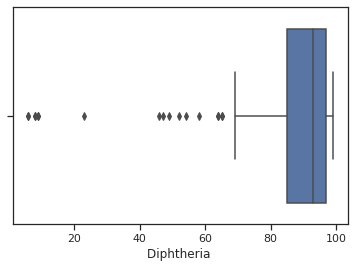

In [955]:
sns.boxplot(x=df_merge_2015_Exp_250Country['Diphtheria '])

In [956]:
Q1 = df_merge_2015_Exp_250Country['Diphtheria '].quantile(0.25)
Q3 = df_merge_2015_Exp_250Country['Diphtheria '].quantile(0.75)
IQR = Q3 - Q1
df_merge_2015_Exp_250Country[df_merge_2015_Exp_250Country['Diphtheria '] < Q1-1.5*IQR]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP
47,Peru,Latin America and Caribbean,58,5.82,0.05,0.90,0.97,0.73,0.41,0.06,0.15,2.59,2015,Developing,75.50,123.00,8,0.00,9.00,4,55.60,10,88.00,9.00,0.10,1.10,1.10,0.74,13.40,31488700,1285216.00,48.10,3.00,94.00,5.67,8.38,5.70,71.40,6229.10
61,Nigeria,Sub-Saharan Africa,78,5.27,0.04,0.65,0.90,0.16,0.34,0.04,0.27,2.89,2015,Developing,54.50,344.00,483,0.00,49.00,12423,25.40,747,49.00,49.00,3.70,9.80,9.70,0.53,10.00,186988000,923768.00,48.80,6.00,61.00,8.70,23.00,5.26,47.10,2730.43
68,Zambia,Sub-Saharan Africa,85,5.13,0.07,0.47,0.92,0.30,0.49,0.12,0.20,2.63,2015,Developing,61.80,33.00,27,0.00,9.00,9,23.40,40,9.00,9.00,4.10,6.30,6.10,0.58,12.50,15933883,752612.00,54.60,6.00,61.00,7.10,15.00,4.11,43.80,1337.80
73,Philippines,Southeastern Asia,90,5.07,0.05,0.71,1.04,0.58,0.63,0.12,0.25,1.75,2015,Developing,68.50,211.00,52,0.00,6.00,619,25.40,66,79.00,6.00,0.10,1.00,9.70,0.68,11.70,103279800,342353.00,43.00,6.00,95.00,2.80,7.00,5.63,66.80,3001.04
75,Mozambique,Sub-Saharan Africa,94,4.97,0.08,0.08,1.03,0.09,0.34,0.16,0.22,3.05,2015,Developing,57.60,355.00,60,0.00,8.00,79,22.60,81,8.00,8.00,3.90,3.60,3.50,0.41,9.10,26423700,801590.00,45.70,7.00,56.00,4.40,17.00,4.47,49.00,589.86
88,Ukraine,Central and Eastern Europe,111,4.68,0.04,0.80,1.20,0.67,0.25,0.03,0.15,1.57,2015,Developing,71.30,195.00,4,0.00,22.00,105,61.30,5,51.00,23.00,0.20,2.30,2.40,0.75,15.30,42692393,603700.00,26.40,0.00,99.00,0.70,8.00,4.33,67.50,2124.66
89,Iraq,Middle East and Northern Africa,112,4.68,0.05,0.99,0.82,0.60,0.00,0.14,0.18,1.95,2015,Developing,68.90,182.00,32,0.00,56.00,1433,59.10,38,63.00,58.00,0.10,5.30,5.10,0.65,10.10,37883543,438317.00,30.90,4.00,78.00,2.00,16.00,4.44,70.00,4989.80
93,Liberia,Sub-Saharan Africa,116,4.57,0.11,0.07,0.79,0.34,0.29,0.06,0.24,2.78,2015,Developing,61.40,259.00,8,0.00,52.00,1060,27.30,11,52.00,52.00,0.90,6.50,6.40,0.43,9.90,4615000,111369.00,38.20,8.00,60.00,5.20,85.00,3.98,51.90,710.38
96,Haiti,Latin America and Caribbean,119,4.52,0.07,0.27,0.74,0.39,0.24,0.17,0.46,2.24,2015,Developing,63.50,24.00,14,0.00,6.00,0,49.90,18,56.00,6.00,0.50,3.90,3.90,0.49,9.10,11078033,27750.00,59.20,3.00,48.00,6.30,40.00,3.60,58.60,815.73
111,Angola,Sub-Saharan Africa,137,4.03,0.05,0.76,0.86,0.17,0.10,0.07,0.12,1.95,2015,Developing,52.40,335.00,66,0.00,64.00,118,23.30,98,7.00,64.00,1.90,8.30,8.20,0.53,11.40,25868000,1246700.00,58.60,5.00,70.00,8.90,30.58,5.45,45.30,4166.98


**Decision: The values are correct, Most of the outliers countries are "developing" which explains why the number of the reported cases for "Diphtheria" are high among them.** 

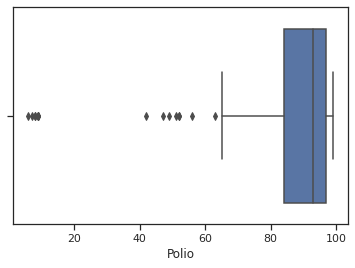

In [957]:
sns.boxplot(x=df_merge_2015_Exp_250Country['Polio'])

In [958]:
Q1 = df_merge_2015_Exp_250Country['Polio'].quantile(0.25)
Q3 = df_merge_2015_Exp_250Country['Polio'].quantile(0.75)
IQR = Q3 - Q1
df_merge_2015_Exp_250Country[df_merge_2015_Exp_250Country['Polio'] < Q1-1.5*IQR]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP
36,Guatemala,Latin America and Caribbean,43,6.12,0.05,0.75,1.04,0.64,0.58,0.09,0.27,2.74,2015,Developing,71.90,186.00,10,0.00,74.00,0,5.60,12,9.00,74.00,0.40,1.20,1.20,0.64,10.70,16176133,108889.00,55.90,3.00,71.00,3.80,4.00,6.44,67.70,3994.64
59,Indonesia,Southeastern Asia,74,5.40,0.03,0.83,1.09,0.64,0.47,0.00,0.52,1.86,2015,Developing,69.10,176.00,114,0.00,78.00,15099,27.40,136,8.00,78.00,0.30,1.40,1.20,0.69,12.90,258705000,1904569.00,34.00,5.00,92.00,7.70,6.00,5.19,66.30,3331.70
61,Nigeria,Sub-Saharan Africa,78,5.27,0.04,0.65,0.90,0.16,0.34,0.04,0.27,2.89,2015,Developing,54.50,344.00,483,0.00,49.00,12423,25.40,747,49.00,49.00,3.70,9.80,9.70,0.53,10.00,186988000,923768.00,48.80,6.00,61.00,8.70,23.00,5.26,47.10,2730.43
68,Zambia,Sub-Saharan Africa,85,5.13,0.07,0.47,0.92,0.30,0.49,0.12,0.20,2.63,2015,Developing,61.80,33.00,27,0.00,9.00,9,23.40,40,9.00,9.00,4.10,6.30,6.10,0.58,12.50,15933883,752612.00,54.60,6.00,61.00,7.10,15.00,4.11,43.80,1337.80
75,Mozambique,Sub-Saharan Africa,94,4.97,0.08,0.08,1.03,0.09,0.34,0.16,0.22,3.05,2015,Developing,57.60,355.00,60,0.00,8.00,79,22.60,81,8.00,8.00,3.90,3.60,3.50,0.41,9.10,26423700,801590.00,45.70,7.00,56.00,4.40,17.00,4.47,49.00,589.86
78,Lesotho,Sub-Saharan Africa,97,4.90,0.09,0.38,1.04,0.08,0.32,0.13,0.16,2.80,2015,Developing,53.70,484.00,4,0.00,93.00,0,32.60,6,9.00,93.00,9.30,5.50,5.30,0.49,10.70,1894194,30355.00,52.50,4.00,89.00,5.00,25.00,3.80,49.30,1152.14
88,Ukraine,Central and Eastern Europe,111,4.68,0.04,0.80,1.20,0.67,0.25,0.03,0.15,1.57,2015,Developing,71.30,195.00,4,0.00,22.00,105,61.30,5,51.00,23.00,0.20,2.30,2.40,0.75,15.30,42692393,603700.00,26.40,0.00,99.00,0.70,8.00,4.33,67.50,2124.66
89,Iraq,Middle East and Northern Africa,112,4.68,0.05,0.99,0.82,0.60,0.00,0.14,0.18,1.95,2015,Developing,68.90,182.00,32,0.00,56.00,1433,59.10,38,63.00,58.00,0.10,5.30,5.10,0.65,10.10,37883543,438317.00,30.90,4.00,78.00,2.00,16.00,4.44,70.00,4989.80
93,Liberia,Sub-Saharan Africa,116,4.57,0.11,0.07,0.79,0.34,0.29,0.06,0.24,2.78,2015,Developing,61.40,259.00,8,0.00,52.00,1060,27.30,11,52.00,52.00,0.90,6.50,6.40,0.43,9.90,4615000,111369.00,38.20,8.00,60.00,5.20,85.00,3.98,51.90,710.38
96,Haiti,Latin America and Caribbean,119,4.52,0.07,0.27,0.74,0.39,0.24,0.17,0.46,2.24,2015,Developing,63.50,24.00,14,0.00,6.00,0,49.90,18,56.00,6.00,0.50,3.90,3.90,0.49,9.10,11078033,27750.00,59.20,3.00,48.00,6.30,40.00,3.60,58.60,815.73


**Decision: The values are correct, Most of the outliers countries are "developing" which explains why the number of the reported cases for "Polio" are high among them.** 

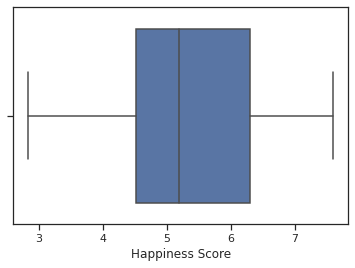

In [959]:
sns.boxplot(x=df_merge_2015_Exp_250Country['Happiness Score'])

**Decision: No Outliers**

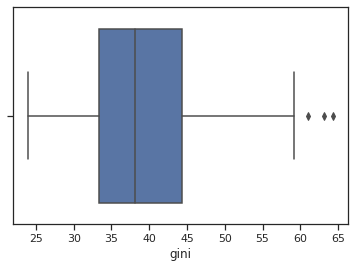

In [960]:
sns.boxplot(x=df_merge_2015_Exp_250Country['gini'])

In [961]:
Q1 = df_merge_2015_Exp_250Country['gini'].quantile(0.25)
Q3 = df_merge_2015_Exp_250Country['gini'].quantile(0.75)
IQR = Q3 - Q1
df_merge_2015_Exp_250Country[df_merge_2015_Exp_250Country['gini'] > Q3+1.5*IQR]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP
90,South Africa,Sub-Saharan Africa,113,4.64,0.05,0.92,1.18,0.28,0.33,0.09,0.12,1.72,2015,Developing,62.90,328.00,42,0.00,75.00,17,51.10,52,75.00,75.00,3.60,4.40,5.30,0.67,13.00,55653654,1221037.00,63.10,5.00,93.00,6.99,30.58,4.72,57.30,5734.63
104,Botswana,Sub-Saharan Africa,128,4.33,0.05,0.99,1.10,0.05,0.49,0.12,0.10,1.46,2015,Developing,65.70,256.00,2,0.00,95.00,0,37.90,2,96.00,95.00,2.20,6.40,6.10,0.70,12.60,2141206,582000.00,61.00,3.00,85.00,6.10,17.00,3.49,47.80,6799.88
113,Comoros,Sub-Saharan Africa,140,3.96,0.05,0.24,0.79,0.36,0.23,0.20,0.17,1.96,2015,Developing,63.50,227.00,1,0.00,91.00,0,24.20,2,92.00,91.00,0.80,6.70,6.50,0.50,11.10,806153,1862.00,64.30,3.00,75.00,6.99,30.58,3.97,59.50,1242.60


**Decision: The values are correct, After investigating the outliers, we found that "South Africa/Comoros" had the highest gini as they were considered as the countries with the most inequality.**

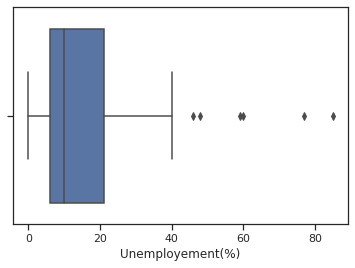

In [962]:
sns.boxplot(x=df_merge_2015_Exp_250Country['Unemployement(%)'])

In [963]:
Q1 = df_merge_2015_Exp_250Country['Unemployement(%)'].quantile(0.25)
Q3 = df_merge_2015_Exp_250Country['Unemployement(%)'].quantile(0.75)
IQR = Q3 - Q1
df_merge_2015_Exp_250Country[df_merge_2015_Exp_250Country['Unemployement(%)'] > Q3+1.5*IQR]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP
56,Turkmenistan,Central and Eastern Europe,70,5.55,0.04,0.96,1.23,0.54,0.48,0.31,0.17,1.87,2015,Developing,66.30,215.00,6,0.00,99.00,0,48.60,7,99.00,99.00,0.10,3.30,3.30,0.69,10.80,4751120,488100.00,40.80,12.00,99.00,9.00,60.00,5.25,63.80,6432.68
93,Liberia,Sub-Saharan Africa,116,4.57,0.11,0.07,0.79,0.34,0.29,0.06,0.24,2.78,2015,Developing,61.40,259.00,8,0.00,52.00,1060,27.30,11,52.00,52.00,0.90,6.50,6.40,0.43,9.90,4615000,111369.00,38.20,8.00,60.00,5.20,85.00,3.98,51.90,710.38
97,Nepal,Southern Asia,121,4.51,0.04,0.36,0.86,0.57,0.38,0.06,0.32,1.96,2015,Developing,69.20,165.00,17,0.00,91.00,1599,19.10,21,9.00,91.00,0.10,15.70,16.10,0.56,12.20,28431500,147181.00,32.80,3.00,57.00,9.50,46.00,4.91,62.50,792.55
102,Djibouti,Sub-Saharan Africa,126,4.37,0.08,0.44,0.59,0.36,0.46,0.28,0.18,2.05,2015,Developing,63.50,241.00,1,0.00,84.00,47,35.00,1,84.00,84.00,2.10,5.60,5.40,0.47,6.30,900000,23200.00,40.00,5.00,67.00,2.50,59.00,5.45,57.40,2658.98
115,Senegal,Sub-Saharan Africa,142,3.90,0.04,0.36,0.98,0.44,0.37,0.11,0.21,1.44,2015,Developing,66.70,188.00,19,0.00,89.00,58,24.30,26,85.00,89.00,0.30,9.50,9.30,0.49,9.50,14799859,196722.00,39.20,4.00,49.00,0.80,48.00,4.68,57.50,1219.25
123,Burkina Faso,Sub-Saharan Africa,152,3.59,0.04,0.26,0.85,0.27,0.39,0.13,0.22,1.46,2015,Developing,59.90,26.00,38,0.00,91.00,99,19.40,61,91.00,91.00,0.60,8.00,7.50,0.40,7.70,19034397,272967.00,39.80,6.00,28.00,2.10,77.00,4.59,51.00,653.33


**Decision: The values are correct, Most of the outliers countries are "developing" which explains why the number of the reported cases for "Unemployement rate" are high among them.** 

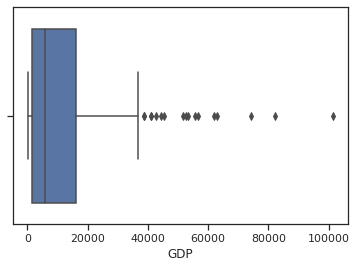

In [964]:
sns.boxplot(x=df_merge_2015_Exp_250Country['GDP'])

In [965]:
Q1 = df_merge_2015_Exp_250Country['GDP'].quantile(0.25)
Q3 = df_merge_2015_Exp_250Country['GDP'].quantile(0.75)
IQR = Q3 - Q1
df_merge_2015_Exp_250Country[df_merge_2015_Exp_250Country['GDP'] > Q3+1.5*IQR]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,0.00,94.50,35,57.40,0,97.00,97.00,0.10,0.40,0.30,0.94,16.00,8341600,41284.00,33.70,2.00,99.00,-0.40,3.00,7.48,79.70,82081.60
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,0.00,94.50,0,61.00,0,92.00,92.00,0.10,1.00,0.90,0.92,19.00,334300,103000.00,30.85,1.00,99.00,3.90,4.00,7.49,79.70,52564.43
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,0.00,94.50,9,58.80,0,93.00,93.00,0.10,1.10,0.90,0.92,19.20,5717014,43094.00,24.00,0.00,99.00,0.80,6.00,7.60,76.90,53254.86
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,0.00,94.50,14,61.20,0,95.00,95.00,0.10,0.80,0.70,0.95,17.70,5223256,323802.00,25.80,1.00,100.00,1.90,3.00,7.55,78.50,74355.52
4,Finland,Western Europe,6,7.41,0.03,1.29,1.32,0.89,0.64,0.41,0.23,2.62,2015,Developing,81.10,76.00,0,0.00,94.50,2,62.10,0,97.00,97.00,0.10,0.90,0.80,0.89,17.00,5491817,338424.00,26.90,2.00,100.00,1.30,8.00,7.77,77.50,42784.70
5,Netherlands,Western Europe,7,7.38,0.03,1.33,1.28,0.89,0.62,0.32,0.48,2.47,2015,Developed,81.90,57.00,1,0.00,94.00,7,62.10,1,95.00,95.00,0.10,1.00,0.90,0.92,18.10,17019800,41850.00,30.90,0.00,99.00,2.50,8.00,7.49,78.10,45175.23
6,Sweden,Western Europe,8,7.36,0.03,1.33,1.29,0.91,0.66,0.44,0.36,2.37,2015,Developed,82.40,53.00,0,0.00,67.00,22,59.50,0,98.00,98.00,0.10,1.50,1.40,0.91,15.90,9894888,450295.00,25.00,0.00,99.00,0.00,8.00,7.34,79.60,51545.48
7,New Zealand,Australia and New Zealand,9,7.29,0.03,1.25,1.32,0.91,0.64,0.43,0.48,2.26,2015,Developed,81.60,66.00,0,0.00,92.00,10,67.50,0,92.00,92.00,0.10,0.40,0.30,0.91,19.20,4697854,270467.00,36.20,2.00,99.00,1.30,6.00,7.31,78.60,38616.00
8,Australia,Australia and New Zealand,10,7.28,0.04,1.33,1.31,0.93,0.65,0.36,0.44,2.27,2015,Developed,82.80,59.00,1,0.00,93.00,74,66.60,1,93.00,93.00,0.10,0.60,0.60,0.94,20.40,24117360,7692024.00,30.50,2.00,99.00,2.40,5.00,7.23,79.50,56755.72
11,Austria,Western Europe,13,7.20,0.04,1.34,1.30,0.89,0.62,0.19,0.33,2.53,2015,Developed,81.50,65.00,0,0.00,93.00,309,57.60,0,93.00,93.00,0.10,1.90,2.10,0.89,15.90,8725931,83871.00,26.00,0.00,98.00,2.10,4.00,7.25,78.10,44178.05


**Decision: The outliers are correct, as the differences in population, physical capital, human capital, and technology contribute to the high GDP difference among countries.**

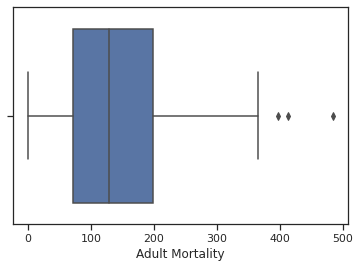

In [966]:
sns.boxplot(x=df_merge_2015_Exp_250Country['Adult Mortality'])

In [967]:
Q1 = df_merge_2015_Exp_250Country['Adult Mortality'].quantile(0.25)
Q3 = df_merge_2015_Exp_250Country['Adult Mortality'].quantile(0.75)
IQR = Q3 - Q1
df_merge_2015_Exp_250Country[df_merge_2015_Exp_250Country['Adult Mortality'] > Q3+1.5*IQR]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP
78,Lesotho,Sub-Saharan Africa,97,4.90,0.09,0.38,1.04,0.08,0.32,0.13,0.16,2.80,2015,Developing,53.70,484.00,4,0.00,93.00,0,32.60,6,9.00,93.00,9.30,5.50,5.30,0.49,10.70,1894194,30355.00,52.50,4.00,89.00,5.00,25.00,3.80,49.30,1152.14
99,Sierra Leone,Sub-Saharan Africa,123,4.51,0.07,0.33,0.96,0.00,0.41,0.09,0.21,2.51,2015,Developing,51.00,413.00,22,0.00,86.00,607,24.40,30,86.00,86.00,0.50,7.40,7.30,0.43,9.50,7075641,71740.00,42.50,13.00,43.00,11.10,30.58,4.37,39.00,588.23
120,Central African Republic,Sub-Saharan Africa,148,3.68,0.06,0.08,0.00,0.07,0.49,0.08,0.24,2.72,2015,Developing,52.50,397.00,15,0.00,47.00,150,22.70,21,47.00,47.00,4.40,8.20,8.20,0.35,7.10,4998000,622984.00,56.30,14.00,56.00,7.00,8.00,3.08,46.00,377.42


**Decision: the outliers are correct, as suboptimal breastfeeding, household air pollution from solid fuels, and alcohol use are the causes of high Adult mortality rate among those countries.**

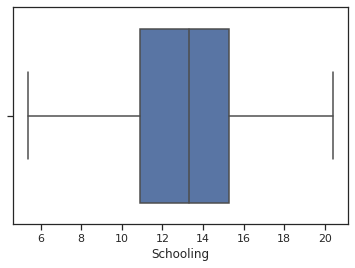

In [968]:
sns.boxplot(x=df_merge_2015_Exp_250Country['Schooling'])

**Decision: No Outliers.**

In [969]:
df_merge_2015_Exp_250Country[df_merge_2015_Exp_250Country[' BMI ']>0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,0.00,94.50,35,57.40,0,97.00,97.00,0.10,0.40,0.30,0.94,16.00,8341600,41284.00,33.70,2.00,99.00,-0.40,3.00,7.48,79.70,82081.60
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,0.00,94.50,0,61.00,0,92.00,92.00,0.10,1.00,0.90,0.92,19.00,334300,103000.00,30.85,1.00,99.00,3.90,4.00,7.49,79.70,52564.43
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,0.00,94.50,9,58.80,0,93.00,93.00,0.10,1.10,0.90,0.92,19.20,5717014,43094.00,24.00,0.00,99.00,0.80,6.00,7.60,76.90,53254.86
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,0.00,94.50,14,61.20,0,95.00,95.00,0.10,0.80,0.70,0.95,17.70,5223256,323802.00,25.80,1.00,100.00,1.90,3.00,7.55,78.50,74355.52
4,Finland,Western Europe,6,7.41,0.03,1.29,1.32,0.89,0.64,0.41,0.23,2.62,2015,Developing,81.10,76.00,0,0.00,94.50,2,62.10,0,97.00,97.00,0.10,0.90,0.80,0.89,17.00,5491817,338424.00,26.90,2.00,100.00,1.30,8.00,7.77,77.50,42784.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,71.28,65.00,1154,19.10,83,6.00,65.00,0.10,17.20,17.30,0.48,10.10,27657145,652230.00,27.80,3.00,28.00,6.80,35.00,3.20,54.80,578.47
125,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,0.00,98.00,1,21.40,15,99.00,98.00,0.40,5.70,5.70,0.49,10.80,11553188,26338.00,50.80,7.00,71.00,5.90,30.58,3.33,48.30,754.91
126,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,0.00,82.00,55,25.70,39,78.00,82.00,1.00,6.90,6.80,0.48,10.70,10653654,112622.00,38.60,5.00,42.00,2.40,30.58,4.88,55.40,1076.80
127,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,0.00,94.00,9,18.70,31,94.00,94.00,0.70,7.30,7.20,0.41,10.60,10114505,27834.00,33.30,4.00,67.00,9.30,30.58,3.77,58.00,305.55


**Research Questions**

**RQ1** : Does the literacy rate affect life expectancy, hepatitis b,measles,aids, diphtheria and polio?





In [970]:
df_lit_dis = df_merge_2015_Exp_250Country[["Literacy Rate(%)","Life expectancy ","Hepatitis B","Measles "," HIV/AIDS","Diphtheria ","Polio"]]
df_lit_dis

,Literacy Rate(%),Life expectancy,Hepatitis B,Measles,HIV/AIDS,Diphtheria,Polio
0,99.00,83.40,94.50,35,0.10,97.00,97.00
1,99.00,82.70,94.50,0,0.10,92.00,92.00
2,99.00,86.00,94.50,9,0.10,93.00,93.00
3,100.00,81.80,94.50,14,0.10,95.00,95.00
4,100.00,81.10,94.50,2,0.10,97.00,97.00
...,...,...,...,...,...,...,...
124,28.00,65.00,65.00,1154,0.10,65.00,6.00
125,71.00,66.10,98.00,1,0.40,98.00,99.00
126,42.00,60.00,82.00,55,1.00,82.00,78.00
127,67.00,59.60,94.00,9,0.70,94.00,94.00


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


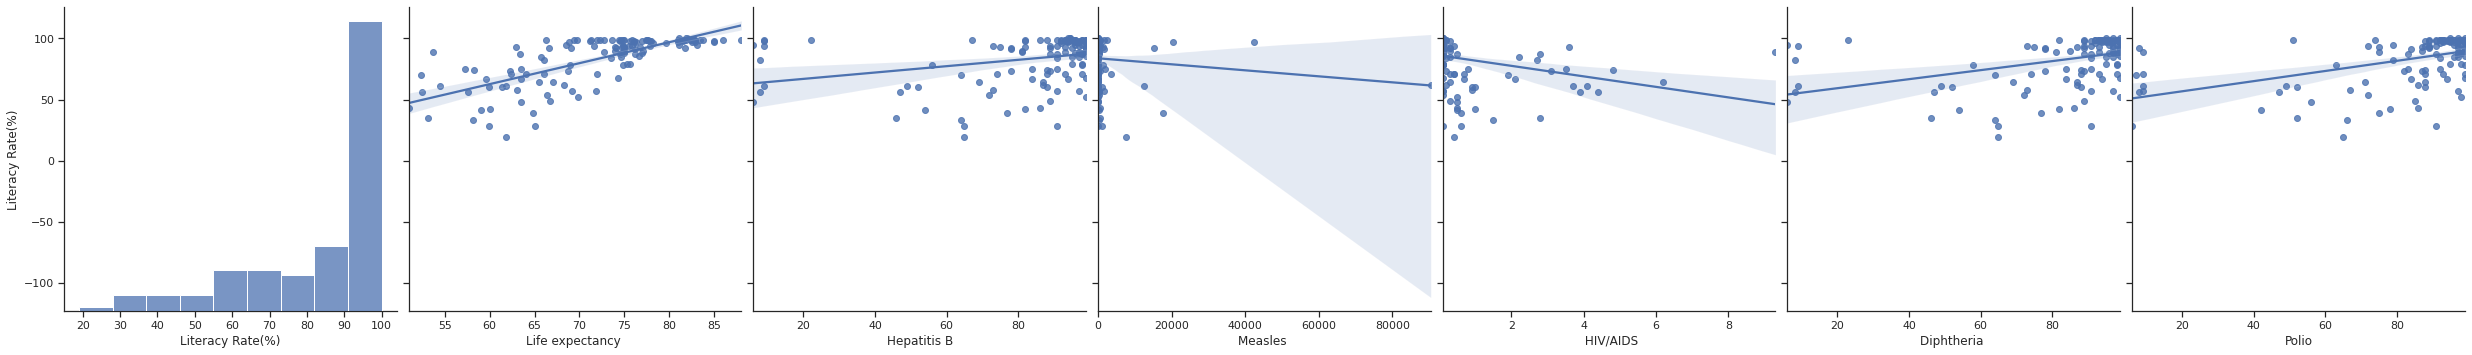

In [971]:
sns.set_theme(style="ticks")
sns.pairplot(df_lit_dis,y_vars=['Literacy Rate(%)'],x_vars=['Literacy Rate(%)',"Life expectancy ","Hepatitis B","Measles "," HIV/AIDS","Diphtheria ","Polio"],kind="reg",size=5)

**Observations:**

1. As we can see the Life expectancy is related to the literacy rate as the literacy rate increases the life expectancy increases
2. Also the immunization covered hepatitis B is affected with the literacy rate as 
3. There is no relation between the literacy rate and measles
4. There is a weak relation between literacy rate and HIV deaths per 1000 as the HIV deaths decreases when the literacy rate increases
5. There is fair relation between literacy rate and the immunization of polio and diphtheria as they increase when literacy rate increases







**RQ2:** Do a country's gini and its unemployment rate affect happiness?

In [972]:
df_happ_gini_unem = df_merge_2015_Exp_250Country[["Happiness Score","gini","Unemployement(%)"]]
df_happ_gini_unem 

,Happiness Score,gini,Unemployement(%)
0,7.59,33.70,3.00
1,7.56,30.85,4.00
2,7.53,24.00,6.00
3,7.52,25.80,3.00
4,7.41,26.90,8.00
...,...,...,...
124,3.58,27.80,35.00
125,3.46,50.80,30.58
126,3.34,38.60,30.58
127,2.90,33.30,30.58


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


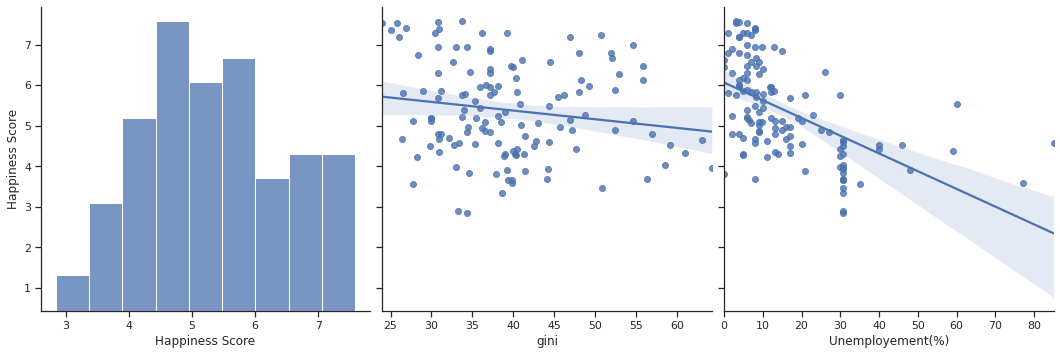

In [973]:
sns.set_theme(style="ticks")
sns.pairplot(df_happ_gini_unem,y_vars=['Happiness Score'],x_vars=['Happiness Score',"gini","Unemployement(%)"],kind="reg",size=5)

**Observations**
1. There is no relation between a country's gini and the happiness of its people
2. There is a relation between the unemployment rate and the happiness as the happiness decreases when the unemployment increases 




```
# This is formatted as code
```

**RQ3 : ** Does the region of a country affect its GDP per capita and the mortality of its adults?

In [974]:
df_reg_gdp_mor = df_merge_2015_Exp_250Country[["Region","GDP","Adult Mortality"]]
df_reg_gdp_mor 

,Region,GDP,Adult Mortality
0,Western Europe,82081.60,49.00
1,Western Europe,52564.43,49.00
2,Western Europe,53254.86,71.00
3,Western Europe,74355.52,59.00
4,Western Europe,42784.70,76.00
...,...,...,...
124,Southern Asia,578.47,263.00
125,Sub-Saharan Africa,754.91,227.00
126,Sub-Saharan Africa,1076.80,249.00
127,Sub-Saharan Africa,305.55,288.00


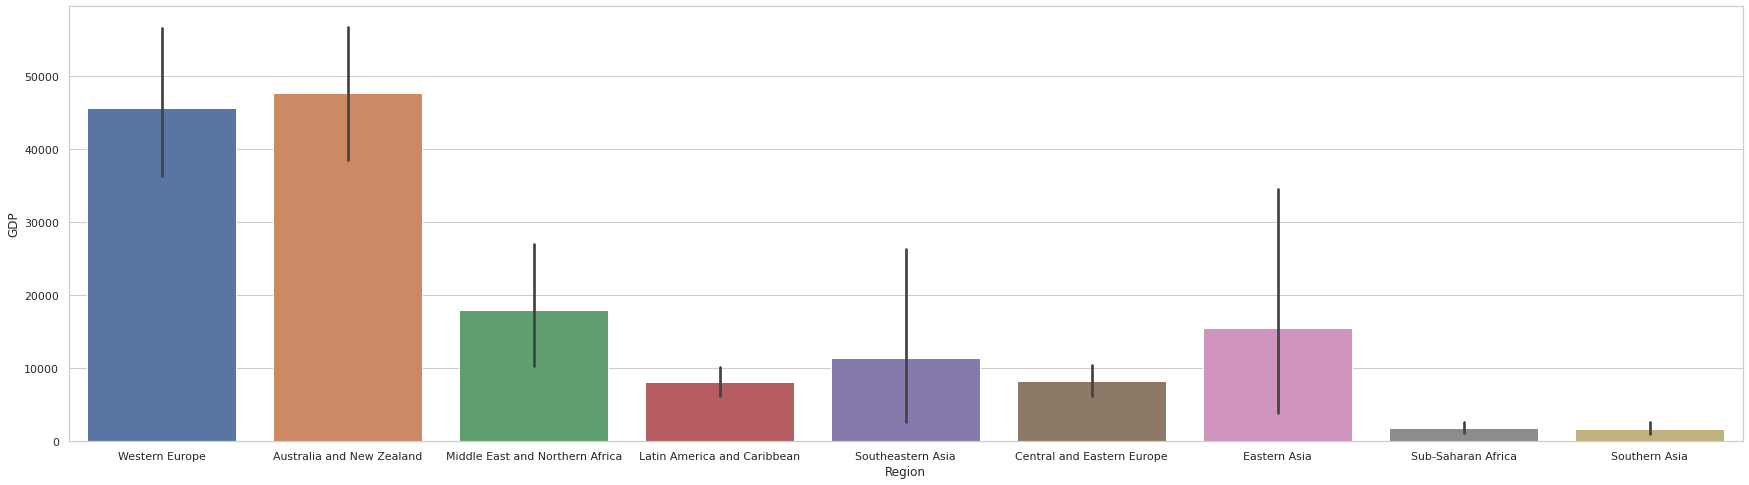

In [975]:
plt.figure(figsize=(30,8))
sns.set_theme(style="whitegrid")
reg_GDP = df_reg_gdp_mor 
ax = sns.barplot(x="Region", y="GDP", data=reg_GDP)

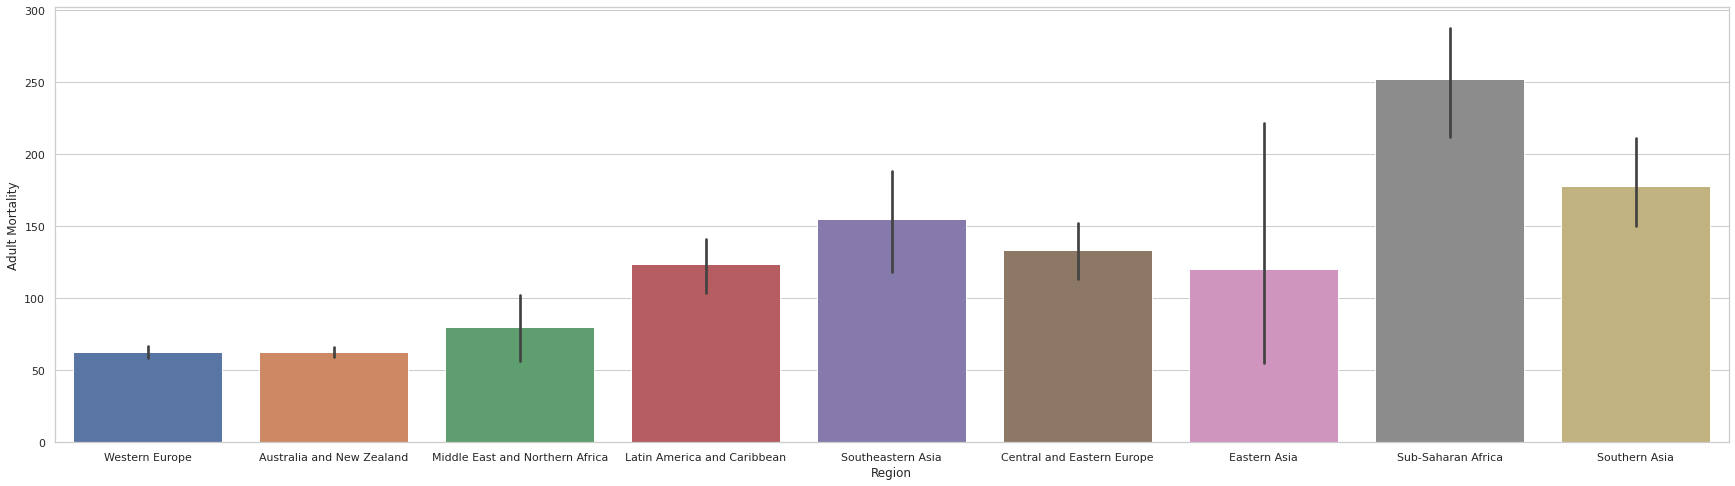

In [976]:
plt.figure(figsize=(30,8))
sns.set_theme(style="whitegrid")
reg_mor = df_reg_gdp_mor 
ax = sns.barplot(x="Region", y="Adult Mortality", data=reg_GDP)

**Observations**
1. There is a relation between region and the GDP per capita for a given country as the variations are clear in the first figure
2. There is a relation between region and the adult mortality for a given country as the variation are clear in the second figure

**RQ4 :** Does a country's area affect its population?

In [977]:
df_area_pop = df_merge_2015_Exp_250Country[["area","population"]]
df_area_pop

,area,population
0,41284.00,8341600
1,103000.00,334300
2,43094.00,5717014
3,323802.00,5223256
4,338424.00,5491817
...,...,...
124,652230.00,27657145
125,26338.00,11553188
126,112622.00,10653654
127,27834.00,10114505


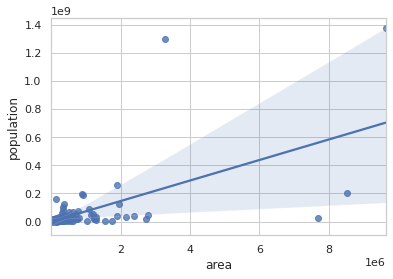

In [978]:
sns.regplot(x=df_area_pop['area'], y=df_area_pop['population'])

**NO RELATION** TO BE EDITED AFTER WE REMOVE THE OUTLIERS

**RQ5 :** Do a country's population and its GDP affect the unemployment rate?

In [979]:
df_pop_gdp_unemp = df_merge_2015_Exp_250Country[["Unemployement(%)","population","GDP"]]
df_pop_gdp_unemp

,Unemployement(%),population,GDP
0,3.00,8341600,82081.60
1,4.00,334300,52564.43
2,6.00,5717014,53254.86
3,3.00,5223256,74355.52
4,8.00,5491817,42784.70
...,...,...,...
124,35.00,27657145,578.47
125,30.58,11553188,754.91
126,30.58,10653654,1076.80
127,30.58,10114505,305.55


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


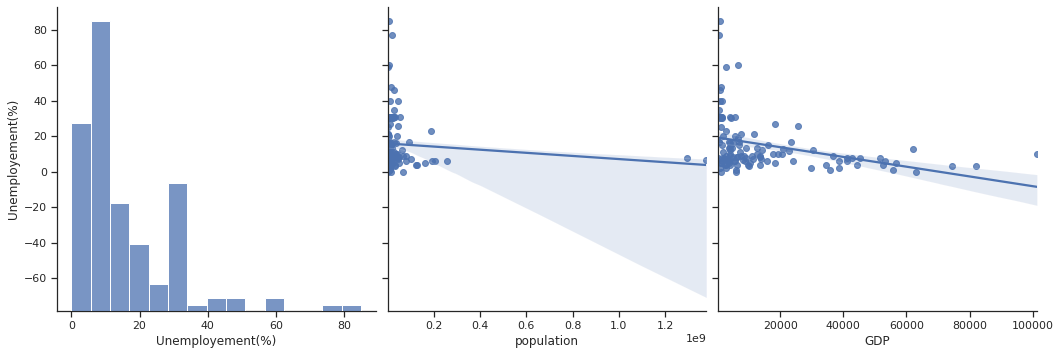

In [980]:

sns.set_theme(style="ticks")
sns.pairplot(df_pop_gdp_unemp,y_vars=['Unemployement(%)'],x_vars=['Unemployement(%)',"population","GDP"],kind="reg",size=5)


**Observations**
1. There is no relation between the population and unemployement
2. There is a weak relation between GDP and unemployement as the unemployement decreases when GDP increases

**RQ6 :** Does the status of a country affects the schooling years or not?

In [981]:
df_stat_scho = df_merge_2015_Exp_250Country[["Status","Schooling"]]
df_stat_scho

,Status,Schooling
0,Developed,16.00
1,Developed,19.00
2,Developed,19.20
3,Developed,17.70
4,Developing,17.00
...,...,...
124,Developing,10.10
125,Developing,10.80
126,Developing,10.70
127,Developing,10.60


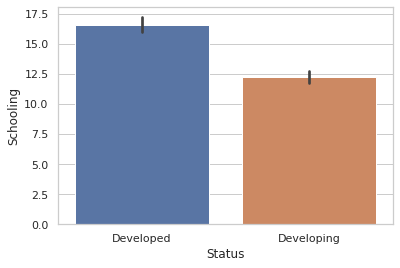

In [982]:

sns.set_theme(style="whitegrid")
stat_school = df_stat_scho
ax = sns.barplot(x="Status", y="Schooling", data=stat_school)

**Observations**
1. Yes, there is a relation, as shown in the figure, developed countries tend to have more schooling years 

**RQ7 :**Does Happiness score have positive or negative relationship with Life Expectency?

In [983]:
df_happ_rel = df_merge_2015_Exp_250Country[["Happiness Score","Life expectancy "]]
df_happ_rel

,Happiness Score,Life expectancy
0,7.59,83.40
1,7.56,82.70
2,7.53,86.00
3,7.52,81.80
4,7.41,81.10
...,...,...
124,3.58,65.00
125,3.46,66.10
126,3.34,60.00
127,2.90,59.60


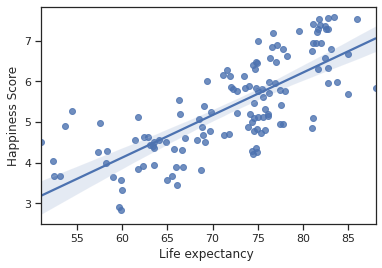

In [984]:
sns.set_theme(style="ticks")
sns.regplot(x=df_happ_rel['Life expectancy '], y=df_happ_rel['Happiness Score'])

**Observations** 
There is a strong positive relation between life expectancy and happiness score 

**Milestone 2 : Feature Engineering**


**Added Feature 1** : We added a new Column (GDP) describing the whole Gross Domestic Product which is the multiplication of GDP per Capita and the population 

In [985]:
df_merge_2015_Exp_250Country.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,0.00,94.50,35,57.40,0,97.00,97.00,0.10,0.40,0.30,0.94,16.00,8341600,41284.00,33.70,2.00,99.00,-0.40,3.00,7.48,79.70,82081.60
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,0.00,94.50,0,61.00,0,92.00,92.00,0.10,1.00,0.90,0.92,19.00,334300,103000.00,30.85,1.00,99.00,3.90,4.00,7.49,79.70,52564.43
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,0.00,94.50,9,58.80,0,93.00,93.00,0.10,1.10,0.90,0.92,19.20,5717014,43094.00,24.00,0.00,99.00,0.80,6.00,7.60,76.90,53254.86
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,0.00,94.50,14,61.20,0,95.00,95.00,0.10,0.80,0.70,0.95,17.70,5223256,323802.00,25.80,1.00,100.00,1.90,3.00,7.55,78.50,74355.52
4,Finland,Western Europe,6,7.41,0.03,1.29,1.32,0.89,0.64,0.41,0.23,2.62,2015,Developing,81.10,76.00,0,0.00,94.50,2,62.10,0,97.00,97.00,0.10,0.90,0.80,0.89,17.00,5491817,338424.00,26.90,2.00,100.00,1.30,8.00,7.77,77.50,42784.70


In [986]:
df_merge_2015_Exp_250Country = df_merge_2015_Exp_250Country.rename(columns={"GDP":"GDP Per Capita"})

In [987]:
df_merge_2015_Exp_250Country["GDP"] = df_merge_2015_Exp_250Country["GDP Per Capita"] * df_merge_2015_Exp_250Country["population"]
pd.set_option('display.float_format', '{:.2f}'.format)
df_merge_2015_Exp_250Country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP Per Capita,GDP
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,0.00,94.50,35,57.40,0,97.00,97.00,0.10,0.40,0.30,0.94,16.00,8341600,41284.00,33.70,2.00,99.00,-0.40,3.00,7.48,79.70,82081.60,684691850536.19
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,0.00,94.50,0,61.00,0,92.00,92.00,0.10,1.00,0.90,0.92,19.00,334300,103000.00,30.85,1.00,99.00,3.90,4.00,7.49,79.70,52564.43,17572288678.22
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,0.00,94.50,9,58.80,0,93.00,93.00,0.10,1.10,0.90,0.92,19.20,5717014,43094.00,24.00,0.00,99.00,0.80,6.00,7.60,76.90,53254.86,304458757319.98
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,0.00,94.50,14,61.20,0,95.00,95.00,0.10,0.80,0.70,0.95,17.70,5223256,323802.00,25.80,1.00,100.00,1.90,3.00,7.55,78.50,74355.52,388377894348.84
4,Finland,Western Europe,6,7.41,0.03,1.29,1.32,0.89,0.64,0.41,0.23,2.62,2015,Developing,81.10,76.00,0,0.00,94.50,2,62.10,0,97.00,97.00,0.10,0.90,0.80,0.89,17.00,5491817,338424.00,26.90,2.00,100.00,1.30,8.00,7.77,77.50,42784.70,234965733793.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,71.28,65.00,1154,19.10,83,6.00,65.00,0.10,17.20,17.30,0.48,10.10,27657145,652230.00,27.80,3.00,28.00,6.80,35.00,3.20,54.80,578.47,15998727799.78
125,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,0.00,98.00,1,21.40,15,99.00,98.00,0.40,5.70,5.70,0.49,10.80,11553188,26338.00,50.80,7.00,71.00,5.90,30.58,3.33,48.30,754.91,8721580055.79
126,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,0.00,82.00,55,25.70,39,78.00,82.00,1.00,6.90,6.80,0.48,10.70,10653654,112622.00,38.60,5.00,42.00,2.40,30.58,4.88,55.40,1076.80,11471830294.25
127,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,0.00,94.00,9,18.70,31,94.00,94.00,0.70,7.30,7.20,0.41,10.60,10114505,27834.00,33.30,4.00,67.00,9.30,30.58,3.77,58.00,305.55,3090484704.73


**Added Feature 2 :** We added a new column(Population/KM2) that describes the number of people per km2 and is calculated by dividing the population over the area

In [988]:
df_merge_2015_Exp_250Country["Population/KM2"] = df_merge_2015_Exp_250Country["population"] / df_merge_2015_Exp_250Country["area"]
df_merge_2015_Exp_250Country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP Per Capita,GDP,Population/KM2
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,0.00,94.50,35,57.40,0,97.00,97.00,0.10,0.40,0.30,0.94,16.00,8341600,41284.00,33.70,2.00,99.00,-0.40,3.00,7.48,79.70,82081.60,684691850536.19,202.05
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,0.00,94.50,0,61.00,0,92.00,92.00,0.10,1.00,0.90,0.92,19.00,334300,103000.00,30.85,1.00,99.00,3.90,4.00,7.49,79.70,52564.43,17572288678.22,3.25
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,0.00,94.50,9,58.80,0,93.00,93.00,0.10,1.10,0.90,0.92,19.20,5717014,43094.00,24.00,0.00,99.00,0.80,6.00,7.60,76.90,53254.86,304458757319.98,132.66
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,0.00,94.50,14,61.20,0,95.00,95.00,0.10,0.80,0.70,0.95,17.70,5223256,323802.00,25.80,1.00,100.00,1.90,3.00,7.55,78.50,74355.52,388377894348.84,16.13
4,Finland,Western Europe,6,7.41,0.03,1.29,1.32,0.89,0.64,0.41,0.23,2.62,2015,Developing,81.10,76.00,0,0.00,94.50,2,62.10,0,97.00,97.00,0.10,0.90,0.80,0.89,17.00,5491817,338424.00,26.90,2.00,100.00,1.30,8.00,7.77,77.50,42784.70,234965733793.32,16.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,71.28,65.00,1154,19.10,83,6.00,65.00,0.10,17.20,17.30,0.48,10.10,27657145,652230.00,27.80,3.00,28.00,6.80,35.00,3.20,54.80,578.47,15998727799.78,42.40
125,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,0.00,98.00,1,21.40,15,99.00,98.00,0.40,5.70,5.70,0.49,10.80,11553188,26338.00,50.80,7.00,71.00,5.90,30.58,3.33,48.30,754.91,8721580055.79,438.65
126,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,0.00,82.00,55,25.70,39,78.00,82.00,1.00,6.90,6.80,0.48,10.70,10653654,112622.00,38.60,5.00,42.00,2.40,30.58,4.88,55.40,1076.80,11471830294.25,94.60
127,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,0.00,94.00,9,18.70,31,94.00,94.00,0.70,7.30,7.20,0.41,10.60,10114505,27834.00,33.30,4.00,67.00,9.30,30.58,3.77,58.00,305.55,3090484704.73,363.39


**Feature 3:** We added 3 new columns(Schooling Index,Life Expectancy Index,Income Index) to calculate a fourth coulmn and to add it which is The Income Index Per Capita for each country. To compute those indices we used this link https://ourworldindata.org/human-development-index#:~:text=The%20HDI%20is%20calculated%20as,and%20expected%20years%20of%20schooling

In [989]:
HDI_Schooling_LifeExpectency = df_merge_2015_Exp_250Country[["Country","Income composition of resources","Schooling","Life expectancy "]]
HDI_Schooling_LifeExpectency

,Country,Income composition of resources,Schooling,Life expectancy
0,Switzerland,0.94,16.00,83.40
1,Iceland,0.92,19.00,82.70
2,Denmark,0.92,19.20,86.00
3,Norway,0.95,17.70,81.80
4,Finland,0.89,17.00,81.10
...,...,...,...,...
124,Afghanistan,0.48,10.10,65.00
125,Rwanda,0.49,10.80,66.10
126,Benin,0.48,10.70,60.00
127,Burundi,0.41,10.60,59.60


In [990]:
HDI_Schooling_LifeExpectency["LEI"] = (HDI_Schooling_LifeExpectency["Life expectancy "] - 20)/(85-20)
HDI_Schooling_LifeExpectency

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country,Income composition of resources,Schooling,Life expectancy,LEI
0,Switzerland,0.94,16.00,83.40,0.98
1,Iceland,0.92,19.00,82.70,0.96
2,Denmark,0.92,19.20,86.00,1.02
3,Norway,0.95,17.70,81.80,0.95
4,Finland,0.89,17.00,81.10,0.94
...,...,...,...,...,...
124,Afghanistan,0.48,10.10,65.00,0.69
125,Rwanda,0.49,10.80,66.10,0.71
126,Benin,0.48,10.70,60.00,0.62
127,Burundi,0.41,10.60,59.60,0.61


In [991]:
HDI_Schooling_LifeExpectency["SI"] = (HDI_Schooling_LifeExpectency["Schooling"] -0)/(18-0)
HDI_Schooling_LifeExpectency

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country,Income composition of resources,Schooling,Life expectancy,LEI,SI
0,Switzerland,0.94,16.00,83.40,0.98,0.89
1,Iceland,0.92,19.00,82.70,0.96,1.06
2,Denmark,0.92,19.20,86.00,1.02,1.07
3,Norway,0.95,17.70,81.80,0.95,0.98
4,Finland,0.89,17.00,81.10,0.94,0.94
...,...,...,...,...,...,...
124,Afghanistan,0.48,10.10,65.00,0.69,0.56
125,Rwanda,0.49,10.80,66.10,0.71,0.60
126,Benin,0.48,10.70,60.00,0.62,0.59
127,Burundi,0.41,10.60,59.60,0.61,0.59


In [992]:
HDI_Schooling_LifeExpectency["II"] = (HDI_Schooling_LifeExpectency["Income composition of resources"])**3/(HDI_Schooling_LifeExpectency["SI"]*HDI_Schooling_LifeExpectency["LEI"])
HDI_Schooling_LifeExpectency

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country,Income composition of resources,Schooling,Life expectancy,LEI,SI,II
0,Switzerland,0.94,16.00,83.40,0.98,0.89,0.95
1,Iceland,0.92,19.00,82.70,0.96,1.06,0.76
2,Denmark,0.92,19.20,86.00,1.02,1.07,0.73
3,Norway,0.95,17.70,81.80,0.95,0.98,0.91
4,Finland,0.89,17.00,81.10,0.94,0.94,0.80
...,...,...,...,...,...,...,...
124,Afghanistan,0.48,10.10,65.00,0.69,0.56,0.28
125,Rwanda,0.49,10.80,66.10,0.71,0.60,0.28
126,Benin,0.48,10.70,60.00,0.62,0.59,0.30
127,Burundi,0.41,10.60,59.60,0.61,0.59,0.19


In [993]:
HDI_Schooling_LifeExpectency["Income Per Capita"] = (HDI_Schooling_LifeExpectency["II"]*(75000-100))+100
HDI_Schooling_LifeExpectency

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country,Income composition of resources,Schooling,Life expectancy,LEI,SI,II,Income Per Capita
0,Switzerland,0.94,16.00,83.40,0.98,0.89,0.95,71396.29
1,Iceland,0.92,19.00,82.70,0.96,1.06,0.76,57194.34
2,Denmark,0.92,19.20,86.00,1.02,1.07,0.73,54478.55
3,Norway,0.95,17.70,81.80,0.95,0.98,0.91,68354.45
4,Finland,0.89,17.00,81.10,0.94,0.94,0.80,60180.28
...,...,...,...,...,...,...,...,...
124,Afghanistan,0.48,10.10,65.00,0.69,0.56,0.28,21290.46
125,Rwanda,0.49,10.80,66.10,0.71,0.60,0.28,21190.35
126,Benin,0.48,10.70,60.00,0.62,0.59,0.30,22885.53
127,Burundi,0.41,10.60,59.60,0.61,0.59,0.19,14071.55


In [994]:
HDI_Schooling_LifeExpectency.drop(["Income composition of resources","Schooling","Life expectancy "],axis=1,inplace=True)

HDI_Schooling_LifeExpectency


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,LEI,SI,II,Income Per Capita
0,Switzerland,0.98,0.89,0.95,71396.29
1,Iceland,0.96,1.06,0.76,57194.34
2,Denmark,1.02,1.07,0.73,54478.55
3,Norway,0.95,0.98,0.91,68354.45
4,Finland,0.94,0.94,0.80,60180.28
...,...,...,...,...,...
124,Afghanistan,0.69,0.56,0.28,21290.46
125,Rwanda,0.71,0.60,0.28,21190.35
126,Benin,0.62,0.59,0.30,22885.53
127,Burundi,0.61,0.59,0.19,14071.55


In [995]:
df_merge_2015_Exp_250Country = pd.merge(df_merge_2015_Exp_250Country,HDI_Schooling_LifeExpectency, on='Country')

In [996]:
df_merge_2015_Exp_250Country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP Per Capita,GDP,Population/KM2,LEI,SI,II,Income Per Capita
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,0.00,94.50,35,57.40,0,97.00,97.00,0.10,0.40,0.30,0.94,16.00,8341600,41284.00,33.70,2.00,99.00,-0.40,3.00,7.48,79.70,82081.60,684691850536.19,202.05,0.98,0.89,0.95,71396.29
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,0.00,94.50,0,61.00,0,92.00,92.00,0.10,1.00,0.90,0.92,19.00,334300,103000.00,30.85,1.00,99.00,3.90,4.00,7.49,79.70,52564.43,17572288678.22,3.25,0.96,1.06,0.76,57194.34
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,0.00,94.50,9,58.80,0,93.00,93.00,0.10,1.10,0.90,0.92,19.20,5717014,43094.00,24.00,0.00,99.00,0.80,6.00,7.60,76.90,53254.86,304458757319.98,132.66,1.02,1.07,0.73,54478.55
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,0.00,94.50,14,61.20,0,95.00,95.00,0.10,0.80,0.70,0.95,17.70,5223256,323802.00,25.80,1.00,100.00,1.90,3.00,7.55,78.50,74355.52,388377894348.84,16.13,0.95,0.98,0.91,68354.45
4,Finland,Western Europe,6,7.41,0.03,1.29,1.32,0.89,0.64,0.41,0.23,2.62,2015,Developing,81.10,76.00,0,0.00,94.50,2,62.10,0,97.00,97.00,0.10,0.90,0.80,0.89,17.00,5491817,338424.00,26.90,2.00,100.00,1.30,8.00,7.77,77.50,42784.70,234965733793.32,16.23,0.94,0.94,0.80,60180.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,71.28,65.00,1154,19.10,83,6.00,65.00,0.10,17.20,17.30,0.48,10.10,27657145,652230.00,27.80,3.00,28.00,6.80,35.00,3.20,54.80,578.47,15998727799.78,42.40,0.69,0.56,0.28,21290.46
125,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,0.00,98.00,1,21.40,15,99.00,98.00,0.40,5.70,5.70,0.49,10.80,11553188,26338.00,50.80,7.00,71.00,5.90,30.58,3.33,48.30,754.91,8721580055.79,438.65,0.71,0.60,0.28,21190.35
126,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,0.00,82.00,55,25.70,39,78.00,82.00,1.00,6.90,6.80,0.48,10.70,10653654,112622.00,38.60,5.00,42.00,2.40,30.58,4.88,55.40,1076.80,11471830294.25,94.60,0.62,0.59,0.30,22885.53
127,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,0.00,94.00,9,18.70,31,94.00,94.00,0.70,7.30,7.20,0.41,10.60,10114505,27834.00,33.30,4.00,67.00,9.30,30.58,3.77,58.00,305.55,3090484704.73,363.39,0.61,0.59,0.19,14071.55


In [997]:
df_merge_2015_Exp_250Country = df_merge_2015_Exp_250Country.rename(columns={"LEI":"Life Expectancy Index","SI":"Schooling Index","II":"Income Index","Income Per Capita":"Gross National Income Per Capita"})


In [998]:
df_merge_2015_Exp_250Country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Happiness Score 2019,Life expectancy 2000,GDP Per Capita,GDP,Population/KM2,Life Expectancy Index,Schooling Index,Income Index,Gross National Income Per Capita
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52,2015,Developed,83.40,49.00,0,0.00,94.50,35,57.40,0,97.00,97.00,0.10,0.40,0.30,0.94,16.00,8341600,41284.00,33.70,2.00,99.00,-0.40,3.00,7.48,79.70,82081.60,684691850536.19,202.05,0.98,0.89,0.95,71396.29
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70,2015,Developed,82.70,49.00,0,0.00,94.50,0,61.00,0,92.00,92.00,0.10,1.00,0.90,0.92,19.00,334300,103000.00,30.85,1.00,99.00,3.90,4.00,7.49,79.70,52564.43,17572288678.22,3.25,0.96,1.06,0.76,57194.34
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49,2015,Developed,86.00,71.00,0,0.00,94.50,9,58.80,0,93.00,93.00,0.10,1.10,0.90,0.92,19.20,5717014,43094.00,24.00,0.00,99.00,0.80,6.00,7.60,76.90,53254.86,304458757319.98,132.66,1.02,1.07,0.73,54478.55
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47,2015,Developed,81.80,59.00,0,0.00,94.50,14,61.20,0,95.00,95.00,0.10,0.80,0.70,0.95,17.70,5223256,323802.00,25.80,1.00,100.00,1.90,3.00,7.55,78.50,74355.52,388377894348.84,16.13,0.95,0.98,0.91,68354.45
4,Finland,Western Europe,6,7.41,0.03,1.29,1.32,0.89,0.64,0.41,0.23,2.62,2015,Developing,81.10,76.00,0,0.00,94.50,2,62.10,0,97.00,97.00,0.10,0.90,0.80,0.89,17.00,5491817,338424.00,26.90,2.00,100.00,1.30,8.00,7.77,77.50,42784.70,234965733793.32,16.23,0.94,0.94,0.80,60180.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Afghanistan,Southern Asia,153,3.58,0.03,0.32,0.30,0.30,0.23,0.10,0.37,1.95,2015,Developing,65.00,263.00,62,71.28,65.00,1154,19.10,83,6.00,65.00,0.10,17.20,17.30,0.48,10.10,27657145,652230.00,27.80,3.00,28.00,6.80,35.00,3.20,54.80,578.47,15998727799.78,42.40,0.69,0.56,0.28,21290.46
125,Rwanda,Sub-Saharan Africa,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67,2015,Developing,66.10,227.00,11,0.00,98.00,1,21.40,15,99.00,98.00,0.40,5.70,5.70,0.49,10.80,11553188,26338.00,50.80,7.00,71.00,5.90,30.58,3.33,48.30,754.91,8721580055.79,438.65,0.71,0.60,0.28,21190.35
126,Benin,Sub-Saharan Africa,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63,2015,Developing,60.00,249.00,25,0.00,82.00,55,25.70,39,78.00,82.00,1.00,6.90,6.80,0.48,10.70,10653654,112622.00,38.60,5.00,42.00,2.40,30.58,4.88,55.40,1076.80,11471830294.25,94.60,0.62,0.59,0.30,22885.53
127,Burundi,Sub-Saharan Africa,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83,2015,Developing,59.60,288.00,21,0.00,94.00,9,18.70,31,94.00,94.00,0.70,7.30,7.20,0.41,10.60,10114505,27834.00,33.30,4.00,67.00,9.30,30.58,3.77,58.00,305.55,3090484704.73,363.39,0.61,0.59,0.19,14071.55


**RQ8:**Does GDP affect country's Happiness score?

In [999]:
GDP_Region = df_merge_2015_Exp_250Country.groupby(['Region'])['GDP'].mean()
GDP_Region

Region
Australia and New Zealand          775105239980.11
Central and Eastern Europe          73886260606.12
Eastern Asia                      5168977519110.69
Latin America and Caribbean        243976770724.22
Middle East and Northern Africa    214242378468.30
Southeastern Asia                  322630445288.34
Southern Asia                      380746403255.09
Sub-Saharan Africa                  43512070748.47
Western Europe                     709274375543.65
Name: GDP, dtype: float64

In [1000]:
GDP_Region_index_list =GDP_Region.index.to_list()
GDP_Region_values_list= GDP_Region.to_list()
print(GDP_Region_values_list,GDP_Region_index_list)

[775105239980.1147, 73886260606.11705, 5168977519110.69, 243976770724.21793, 214242378468.29965, 322630445288.3388, 380746403255.0921, 43512070748.47178, 709274375543.65] ['Australia and New Zealand', 'Central and Eastern Europe', 'Eastern Asia', 'Latin America and Caribbean', 'Middle East and Northern Africa', 'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa', 'Western Europe']


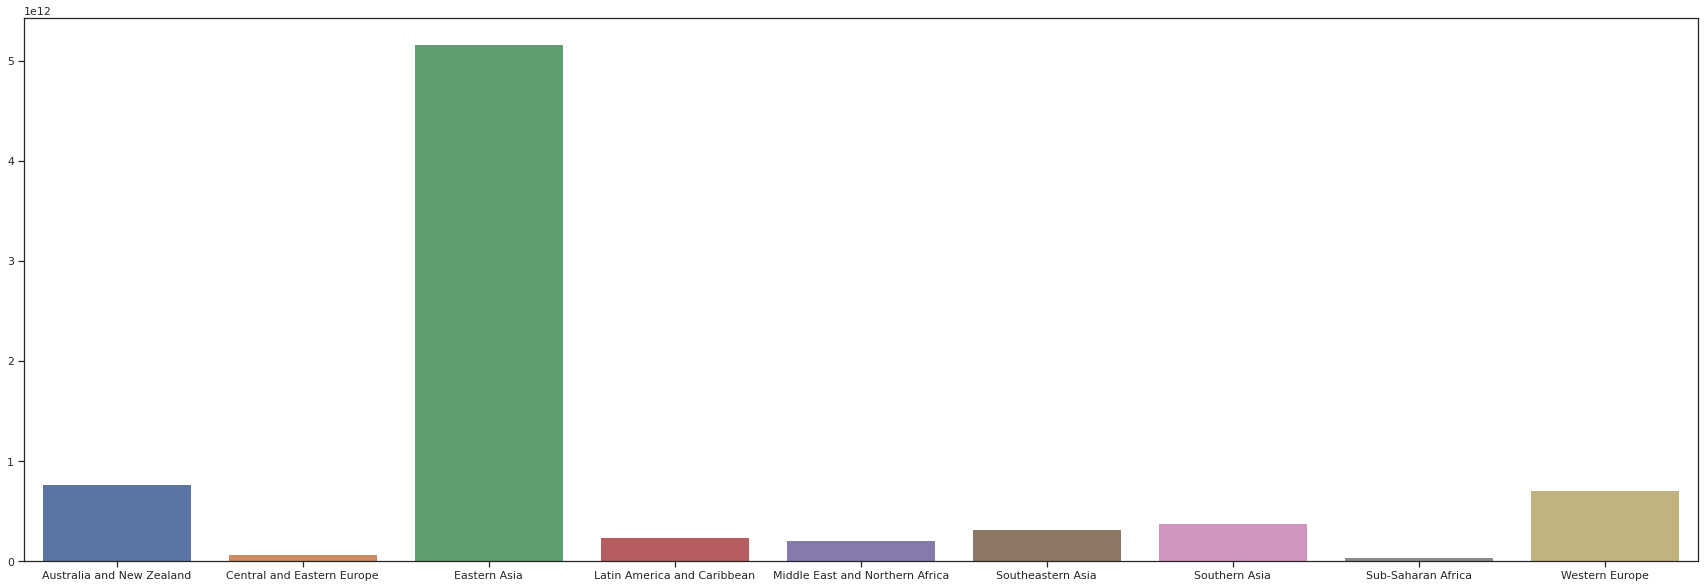

In [1001]:
plt.figure(figsize=(30,10))
sns.barplot(x=GDP_Region_index_list, y=GDP_Region_values_list)

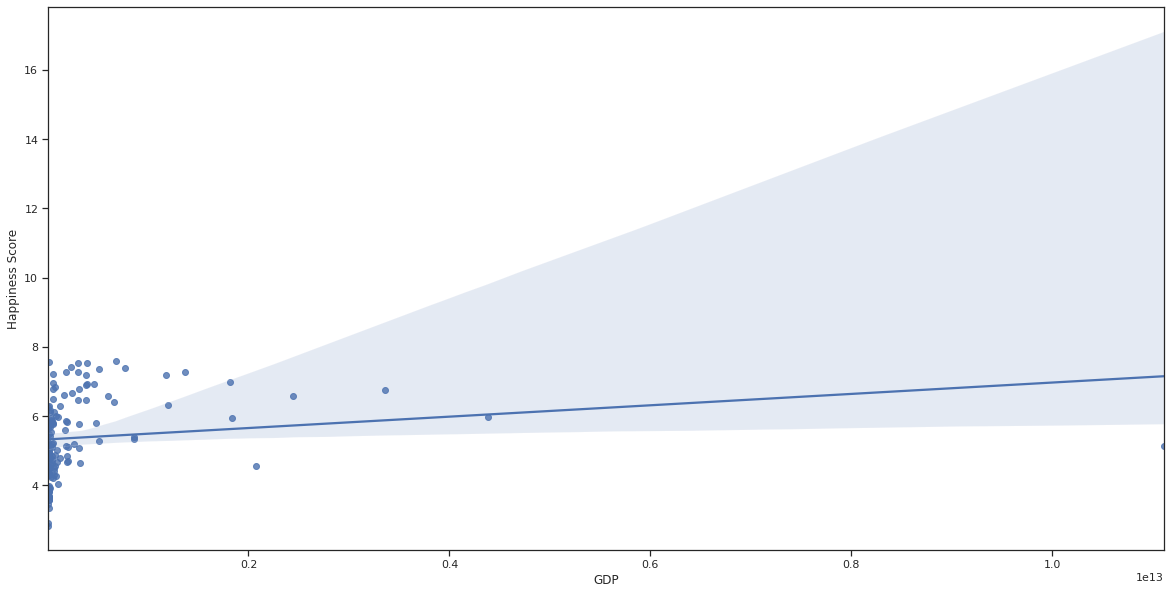

In [1002]:
plt.figure(figsize=(20,10))
sns.regplot(x=df_merge_2015_Exp_250Country['GDP'],y= df_merge_2015_Exp_250Country['Happiness Score'])

**Observation:** there is relation between the GDP and the happiness score.

**RQ9 :**Does the Population/KM2 increases the number of Measles reported cases?

In [1003]:
popPerKm_Region = df_merge_2015_Exp_250Country.groupby(['Region'])['Population/KM2'].mean()
popPerKm_Region

Region
Australia and New Zealand           10.25
Central and Eastern Europe          67.27
Eastern Asia                       160.27
Latin America and Caribbean        106.93
Middle East and Northern Africa    258.82
Southeastern Asia                 1231.12
Southern Asia                      325.78
Sub-Saharan Africa                 106.09
Western Europe                     202.43
Name: Population/KM2, dtype: float64

In [1004]:
popPerKm_Region_index_list =popPerKm_Region.index.to_list()
popPerKm_Region_values_list= popPerKm_Region.to_list()
print(popPerKm_Region_values_list,popPerKm_Region_index_list)

[10.252394517095484, 67.26846406525668, 160.26624206572257, 106.93206339530909, 258.81889698193055, 1231.1218365600905, 325.78224899628896, 106.09094295788417, 202.43271714606828] ['Australia and New Zealand', 'Central and Eastern Europe', 'Eastern Asia', 'Latin America and Caribbean', 'Middle East and Northern Africa', 'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa', 'Western Europe']


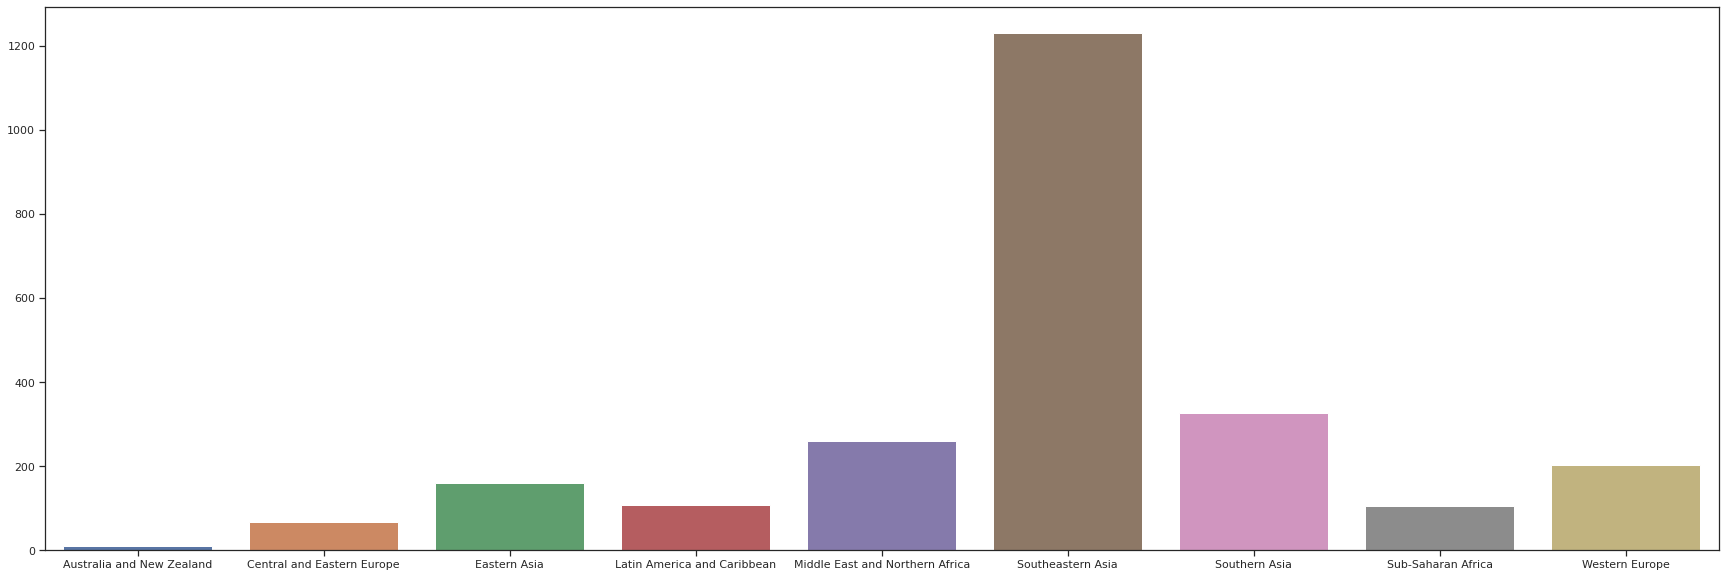

In [1005]:
plt.figure(figsize=(30,10))
sns.barplot(x=popPerKm_Region_index_list, y=popPerKm_Region_values_list)

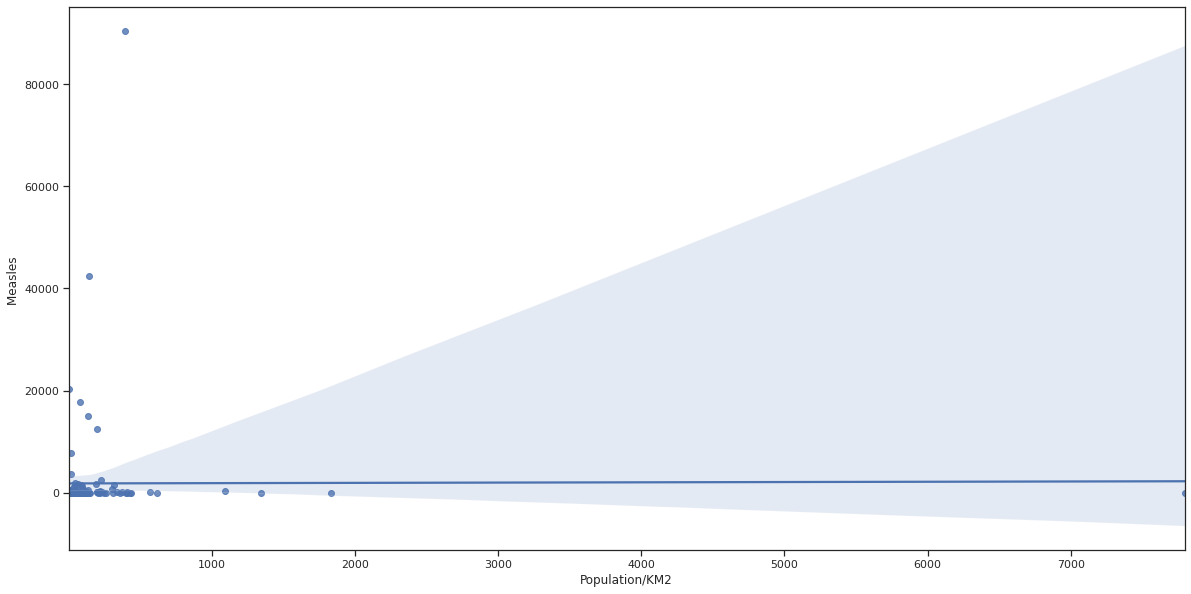

In [1006]:
plt.figure(figsize=(20,10))
sns.regplot(x=df_merge_2015_Exp_250Country['Population/KM2'],y=df_merge_2015_Exp_250Country['Measles '])

**Observation :** AS we can see as the population density increases there is no noticable increase in the number of reported Measles cases.

**RQ10 :** How does GNI compare with GDP for countries?

In [1007]:
GNI_Region = df_merge_2015_Exp_250Country.groupby(['Region'])['Gross National Income Per Capita'].mean()
GNI_Region

Region
Australia and New Zealand         56431.02
Central and Eastern Europe        53158.77
Eastern Asia                      53276.53
Latin America and Caribbean       45812.37
Middle East and Northern Africa   53904.20
Southeastern Asia                 47822.42
Southern Asia                     33571.21
Sub-Saharan Africa                27666.90
Western Europe                    61284.47
Name: Gross National Income Per Capita, dtype: float64

In [1008]:
GNI_Region_index_list =GNI_Region.index.to_list()
GNI_Region_values_list= GNI_Region.to_list()
print(GNI_Region_values_list,GNI_Region_index_list)

[56431.01672556124, 53158.76862954092, 53276.53104194624, 45812.37238887138, 53904.201583138, 47822.42493172807, 33571.214989340304, 27666.89688285448, 61284.46783110997] ['Australia and New Zealand', 'Central and Eastern Europe', 'Eastern Asia', 'Latin America and Caribbean', 'Middle East and Northern Africa', 'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa', 'Western Europe']


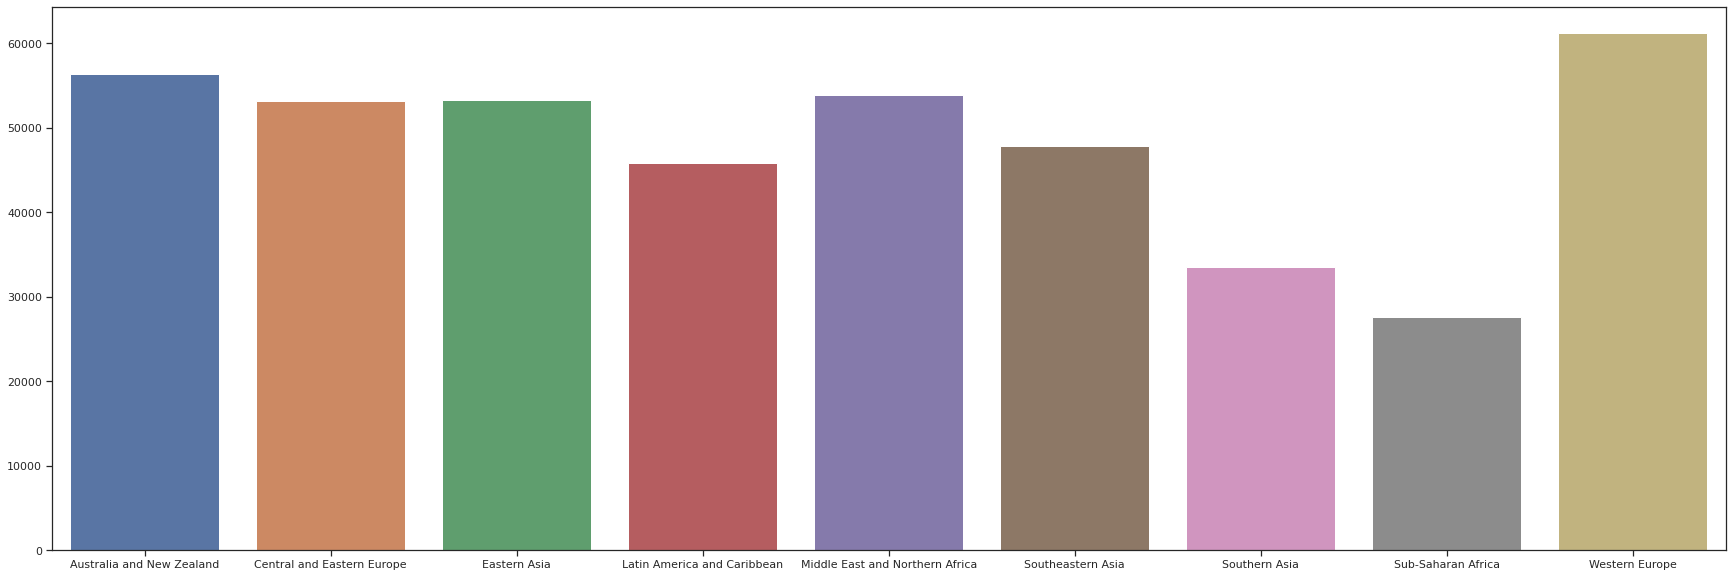

In [1009]:
plt.figure(figsize=(30,10))
sns.barplot(x=GNI_Region_index_list, y=GNI_Region_values_list)

In [1010]:
GDP_per_cap_Region = df_merge_2015_Exp_250Country.groupby(['Region'])['GDP Per Capita'].mean()
GDP_cap_Region_index_list =GDP_per_cap_Region.index.to_list()
GDP_cap_Region_values_list= GDP_per_cap_Region.to_list()

Text(0.5, 0, 'Region')

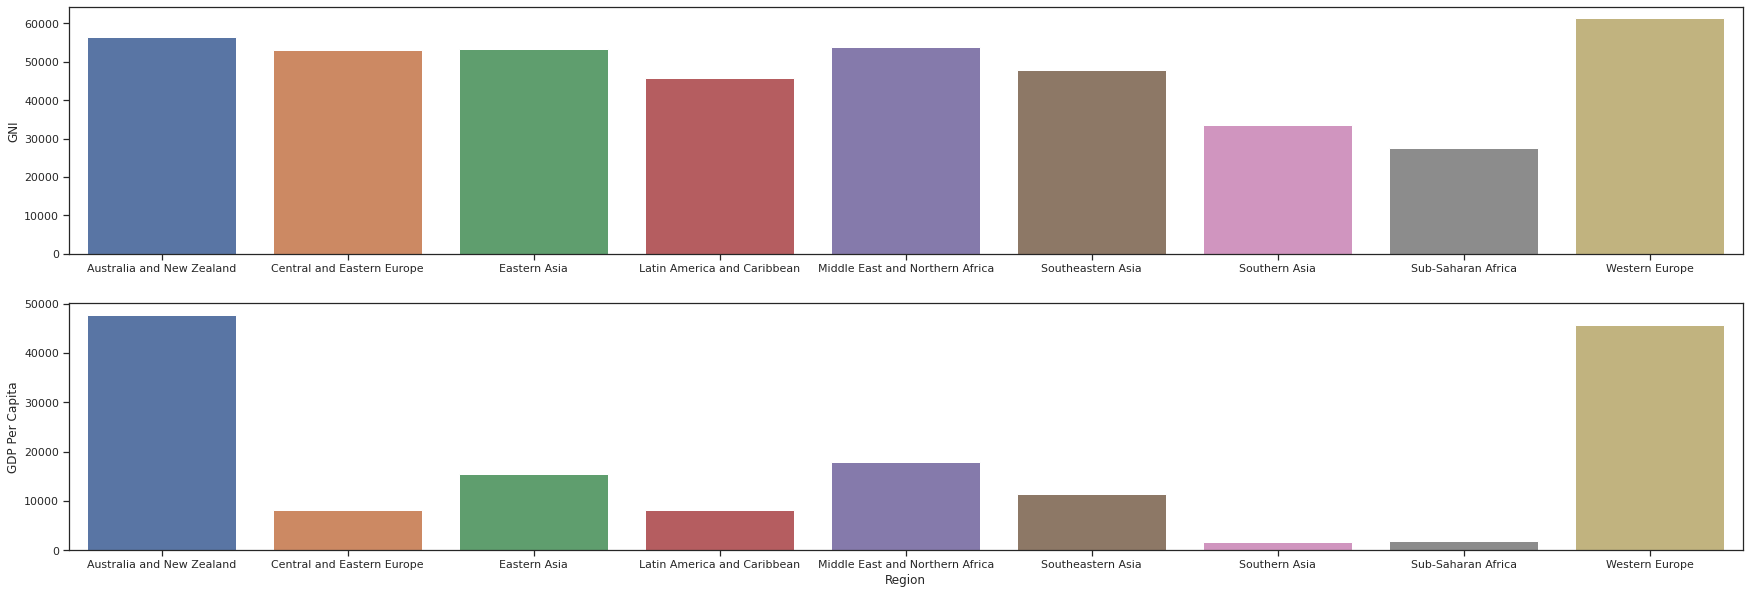

In [1011]:
fig, axs = plt.subplots(2,1,figsize=(30,10))
sns.barplot(x=GNI_Region_index_list, y=GNI_Region_values_list, ax=axs[0])
axs[0].set_ylabel('GNI')
sns.barplot(x=GDP_cap_Region_index_list, y=GDP_cap_Region_values_list, ax=axs[1])
axs[1].set_ylabel('GDP Per Capita')
axs[1].set_xlabel('Region')

Observation: in both regions Western Europe , Austrilia and New Zealand GNI and GDP is nearly the same but for other regions the GNI is much higher this is due to the imports of other countries is much higher than the exports.

RQ11: How did the Happiness score change for Regions from year 2015 to 2019?

In [1012]:
happiness_score_2019_Region = df_merge_2015_Exp_250Country.groupby(['Region'])['Happiness Score 2019'].mean()
happiness_score_2019_Region

Region
Australia and New Zealand         7.27
Central and Eastern Europe        5.47
Eastern Asia                      5.45
Latin America and Caribbean       5.96
Middle East and Northern Africa   5.65
Southeastern Asia                 5.36
Southern Asia                     4.53
Sub-Saharan Africa                4.41
Western Europe                    6.89
Name: Happiness Score 2019, dtype: float64

In [1013]:
happiness_score_2015_Region = df_merge_2015_Exp_250Country.groupby(['Region'])['Happiness Score'].mean()
happiness_score_2015_Region

Region
Australia and New Zealand         7.29
Central and Eastern Europe        5.21
Eastern Asia                      5.33
Latin America and Caribbean       6.12
Middle East and Northern Africa   5.83
Southeastern Asia                 5.37
Southern Asia                     4.58
Sub-Saharan Africa                4.18
Western Europe                    6.73
Name: Happiness Score, dtype: float64

In [1014]:
happiness_score_2019_Region_index_list =happiness_score_2019_Region.index.to_list()
happiness_score_2019_Region_values_list= happiness_score_2019_Region.to_list()
happiness_score_2015_Region_index_list =happiness_score_2015_Region.index.to_list()
happiness_score_2015_Region_values_list= happiness_score_2015_Region.to_list()

print(happiness_score_2019_Region_values_list,happiness_score_2019_Region_index_list)
print(happiness_score_2015_Region_values_list,happiness_score_2015_Region_index_list)

[7.2675, 5.473727272727272, 5.454000000000001, 5.9633918604651175, 5.6468279069767435, 5.356000000000001, 4.526857142857143, 4.413625170998633, 6.890210526315789] ['Australia and New Zealand', 'Central and Eastern Europe', 'Eastern Asia', 'Latin America and Caribbean', 'Middle East and Northern Africa', 'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa', 'Western Europe']
[7.285, 5.2121818181818185, 5.333666666666666, 6.12415, 5.8306666666666676, 5.374428571428572, 4.580857142857143, 4.183705882352941, 6.732631578947368] ['Australia and New Zealand', 'Central and Eastern Europe', 'Eastern Asia', 'Latin America and Caribbean', 'Middle East and Northern Africa', 'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa', 'Western Europe']


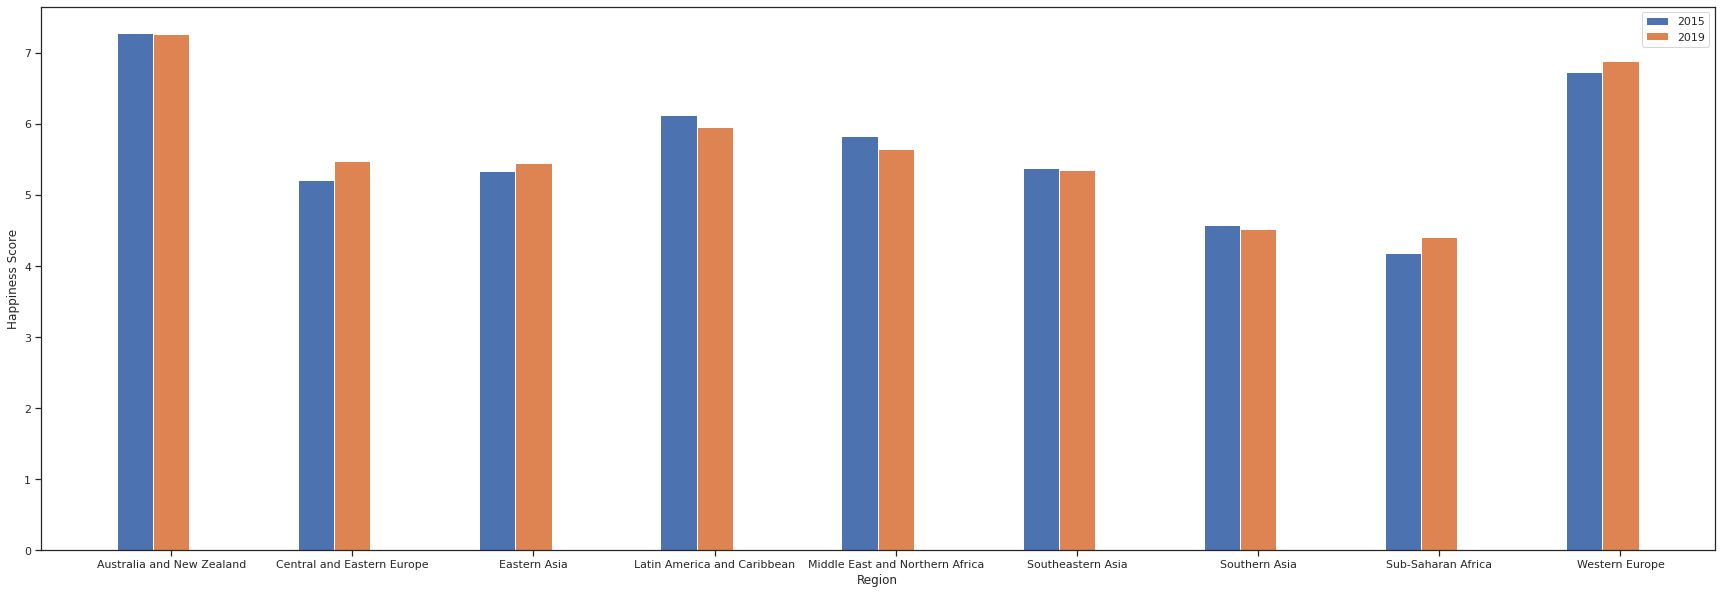

In [1015]:
fig_4, axs_5 = plt.subplots(1,1,figsize=(30,10))
axs_5.set_xlabel('Region')
axs_5.set_ylabel('Happiness Score')
temp_x_2019 =np.arange(len(happiness_score_2019_Region_index_list))
axs_5.bar(np.arange(len(happiness_score_2015_Region_index_list)),happiness_score_2015_Region_values_list,width=0.2,label="2015")
axs_5.bar(temp_x_2019+0.2,happiness_score_2019_Region_values_list,width=0.2,label="2019")
plt.xticks(temp_x_2019+0.2, [f"{i}" for i in happiness_score_2015_Region_index_list])
axs_5.legend(loc=1)


**Observation: Happiness score hasn't changed too much in those 4 years. (There only exist a slight positive/negative change)**

**RQ12**: Does Life Expectency increase from year 2000 to year 2015 due to the medical advancements?

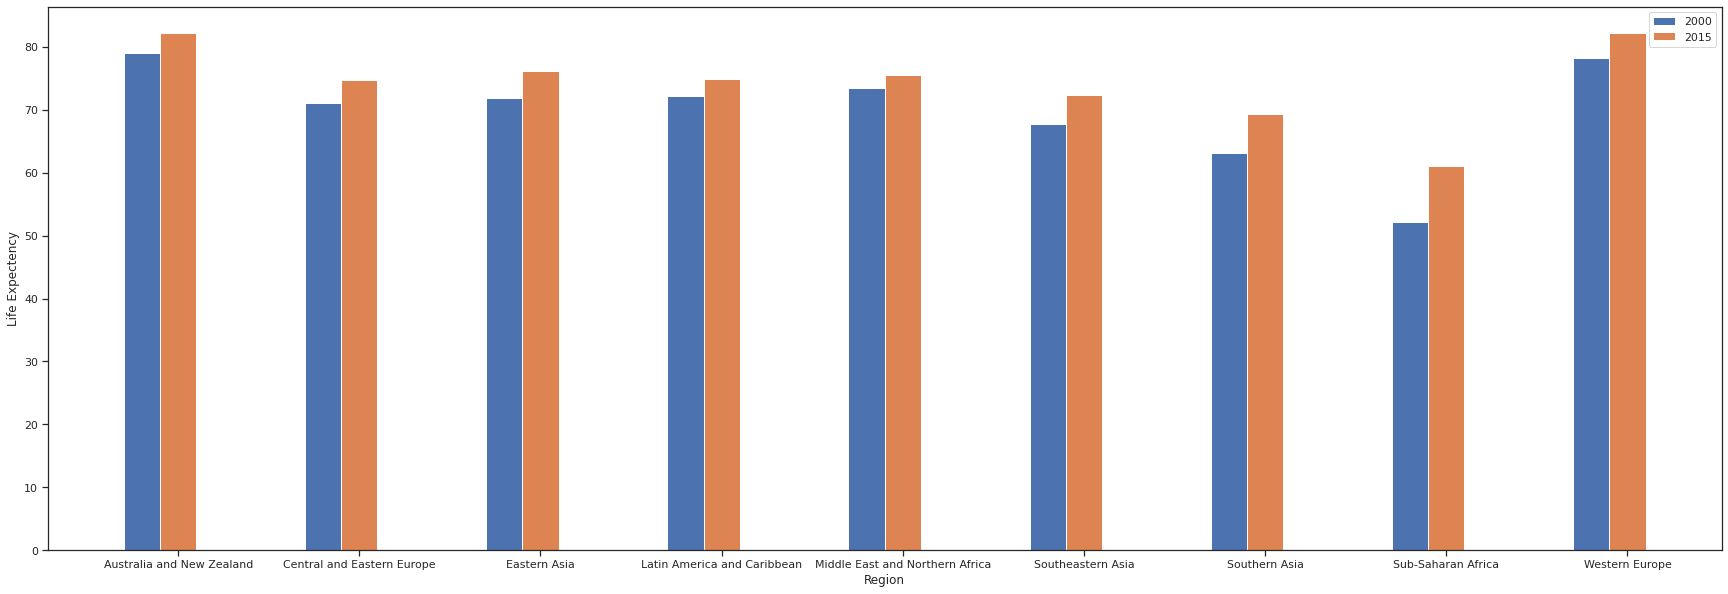

In [1016]:
Life_Expectency_2015_Region = df_merge_2015_Exp_250Country.groupby(['Region'])['Life expectancy '].mean()
Life_Expectency_2000_Region = df_merge_2015_Exp_250Country.groupby(['Region'])['Life expectancy 2000'].mean()

Life_Expectency_2015_Region_index_list =Life_Expectency_2015_Region.index.to_list()
Life_Expectency_2015_Region_values_list= Life_Expectency_2015_Region.to_list()
Life_Expectency_2000_Region_index_list =Life_Expectency_2000_Region.index.to_list()
Life_Expectency_2000_Region_values_list= Life_Expectency_2000_Region.to_list()

fig_5, axs_6 = plt.subplots(1,1,figsize=(30,10))
axs_6.set_xlabel('Region')
axs_6.set_ylabel('Life Expectency')
temp_x_2015 =np.arange(len(Life_Expectency_2015_Region_index_list))
axs_6.bar(np.arange(len(Life_Expectency_2000_Region_index_list)),Life_Expectency_2000_Region_values_list,width=0.2,label="2000")
axs_6.bar(temp_x_2015+0.2,Life_Expectency_2015_Region_values_list,width=0.2,label="2015")
plt.xticks(temp_x_2015+0.2, [f"{i}" for i in Life_Expectency_2000_Region_index_list])
axs_6.legend(loc=1)

**Observation:** Due to the medical advances in those 15 years, Life Expectency has consistently increased among all Regions across the globe.